In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql.sqldf as sql
import random

pd.set_option('float_format', '{:f}'.format)

import pickle


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## checking the nan values

In [4]:
for col in df.columns:
    n = 25-len(col)
    print(col,' '*n,df[col].isna().mean())

id                         0.0
Gender                     0.0
Age                        0.0
Driving_License            0.0
Region_Code                0.0
Previously_Insured         0.0
Vehicle_Age                0.0
Vehicle_Damage             0.0
Annual_Premium             0.0
Policy_Sales_Channel       0.0
Vintage                    0.0
Response                   0.0


## checking nan values in categorical data

In [5]:
categorical_data = [i for i in df.columns if df[i].dtype=='O']
categorical_data

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [6]:
for col in categorical_data:
    print(col,'\n')
    print(df[col].unique(),'\n\n')
    

Gender 

['Male' 'Female'] 


Vehicle_Age 

['> 2 Years' '1-2 Year' '< 1 Year'] 


Vehicle_Damage 

['Yes' 'No'] 




## categorical and numberical data

In [7]:
numerical_data = [i for i in df.columns if i not in categorical_data+['id']]
numerical_data

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [8]:
numerical_data.remove('Region_Code')
categorical_data.append('Region_Code')

In [9]:
numerical_data.remove('Policy_Sales_Channel')
categorical_data.append('Policy_Sales_Channel')

In [10]:
df['Region_Code'] = df['Region_Code'].apply(lambda x:str(x).split('.')[0])

In [11]:
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].apply(lambda x:str(x).split('.')[0])

<font size=4>
the Region_Code is a categorical data, because say region code 8 and 9 are not closer than what 8 is to 20. <br>
Similarly, Policy_Sales_Channel is also a categorical data for the same reasons.

## Feature Engineering & Exploratory Data Analysis

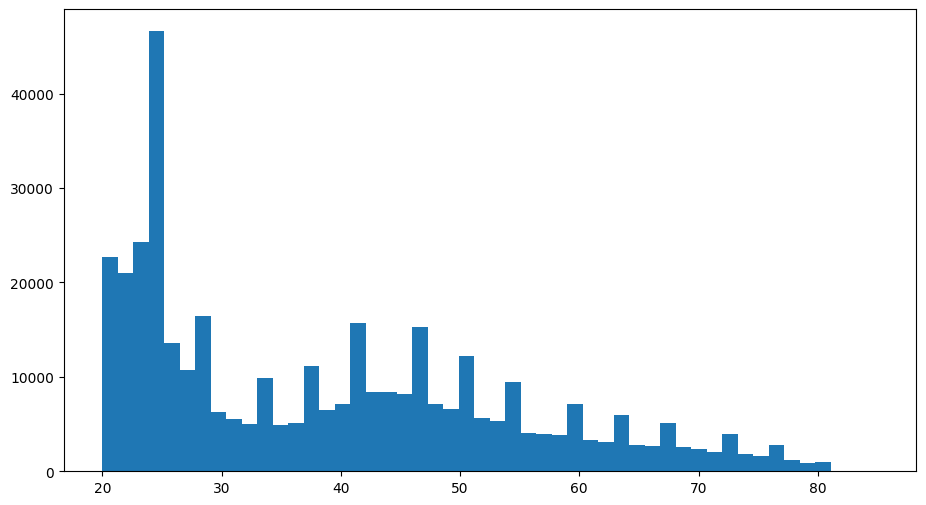

In [12]:
plt.figure(figsize=(11,6))
plt.hist(df['Age'],bins=50)
plt.show()

<font size=4>
most insured customers are from around the age group of 20-25

In [13]:
df['Age'].min()

20

In [14]:
df['age_youth'] = df['Age'].apply(lambda x: 1 if x<=24 else 0)
df['age_adult'] = df['Age'].apply(lambda x: 1 if x>24 and x<=64 else 0)
df['age_seniors'] = df['Age'].apply(lambda x: 1 if x>64 else 0)

In [15]:
x = [1,2,3]

In [16]:
x[0] = 3
x

[3, 2, 3]

In [17]:
df.loc[3]

id                                4
Gender                         Male
Age                              21
Driving_License                   1
Region_Code                      11
Previously_Insured                1
Vehicle_Age                < 1 Year
Vehicle_Damage                   No
Annual_Premium         28619.000000
Policy_Sales_Channel            152
Vintage                         203
Response                          0
age_youth                         1
age_adult                         0
age_seniors                       0
Name: 3, dtype: object

([<matplotlib.patches.Wedge at 0xffff56f09120>,
 [Text(0.7867942153328745, 0.7687358861915622, 'age_youth'),
  Text(-0.9549280201235576, -0.5459967732348813, 'age_adult'),
  Text(1.0645992194256808, -0.27681853622586633, 'age_seniors')],
 [Text(0.4291604810906588, 0.4193104833772157, '24.63'),
  Text(-0.5208698291583042, -0.29781642176448064, '67.27'),
  Text(0.5806904833230986, -0.15099192885047252, '8.10')])

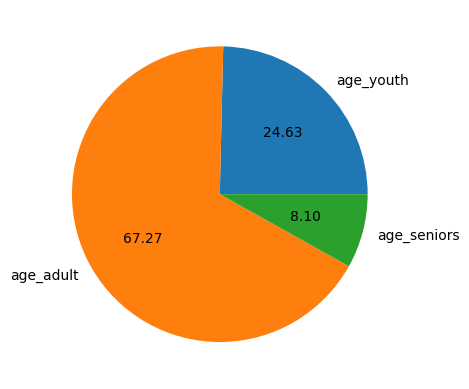

In [18]:
x = []
for i in ['age_youth','age_adult','age_seniors']:
    x.append(df[i].sum())
plt.pie(x,labels=['age_youth','age_adult','age_seniors'],autopct='%.2f')


<font size = 4>
    even though the most customers are from age 20-25, if we consider the age categories then the working age population, the adults are the majority.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  age_youth             381109 non-null  int64  
 13  age_adult             381109 non-null  int64  
 14  age_seniors           381109 non-null  int64  
dtype

In [20]:
def compare_binary_3(df,x,y,z):
    x_list = df[x].unique()
    y_list = df[y].unique()
    z_list = list(df[z].unique())
    
    z0 = {}
    z1 = {}
    
    for i in y_list:
        for ii in x_list:
            z0[y.split('_')[-1]+'_'+str(i)+'_'+ii] = len(df[(df[y]==i) & (df[x]==ii) & (df[z]==z_list[0])])
    
    for i in y_list:
        for ii in x_list:
            z1[y.split('_')[-1]+'_'+str(i)+'_'+ii] = len(df[(df[y]==i) & (df[x]==ii) & (df[z]==z_list[1])])
    
    record = {z+'_'+str(z_list[0]):z0,z+'_'+str(z_list[1]):z1}
    
               
    return record

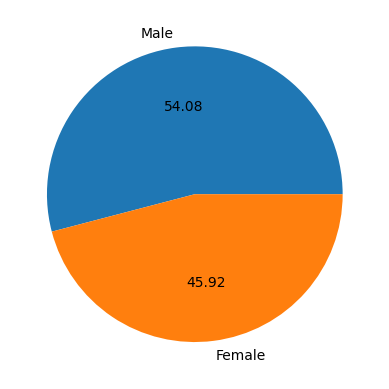

In [21]:
plt.pie(x=df['Gender'].apply(lambda x: 1 if x=='Male' else 0).value_counts(),labels=['Male','Female'],autopct='%.2f')
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='Age'>

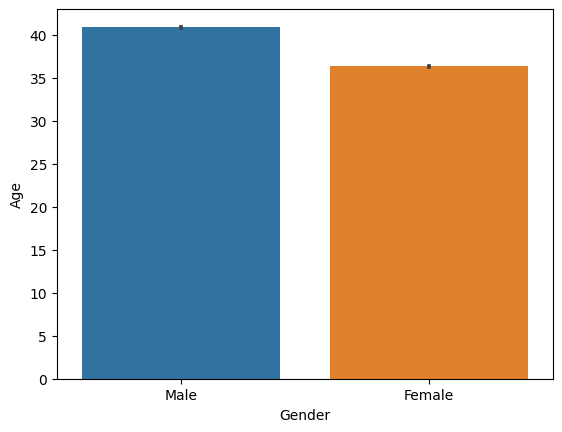

In [22]:
sns.barplot(data=df,x='Gender',y='Age',estimator=np.average)

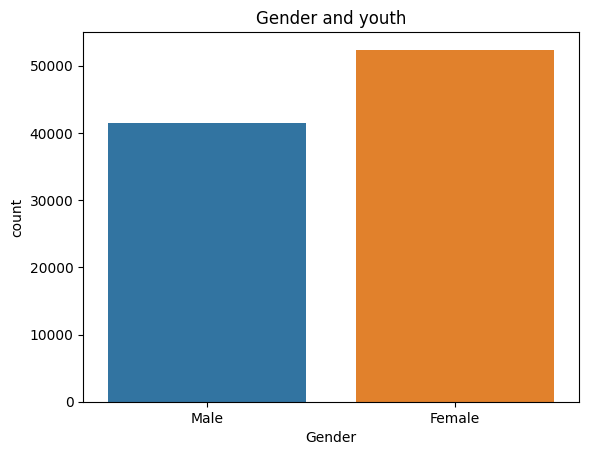

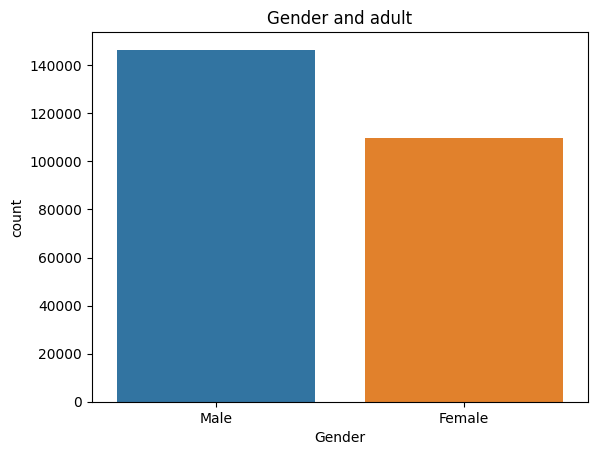

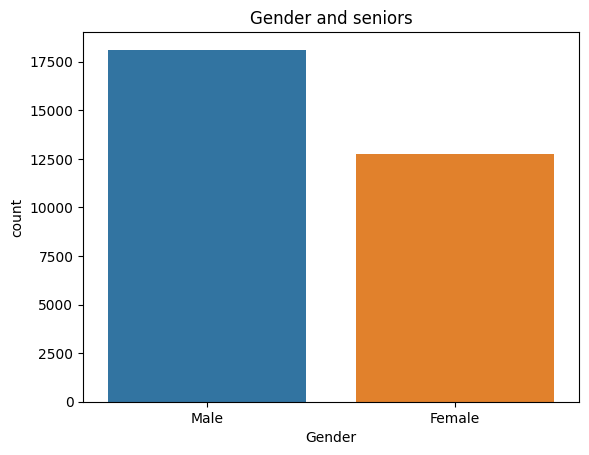

In [23]:
for i in ['age_youth','age_adult','age_seniors']:
    sns.countplot(data=df[df[i]==1],x='Gender')
    plt.title('Gender and '+i[4:])

    plt.show()

<font size =4>
    male and female ratio gap is not very significant<br><br>
    but if we consider age categories, in the youth, females are sightly more likely to be a customer, on the other hand customers who are adults and seniors are slightly more likely to be female.

In [24]:
x = compare_binary_3(df,'Gender','age_youth','Driving_License')
y = compare_binary_3(df,'Gender','age_adult','Driving_License')
z = compare_binary_3(df,'Gender','age_seniors','Driving_License')
x,y,z



({'Driving_License_1': {'youth_0_Male': 164004,
   'youth_0_Female': 122426,
   'youth_1_Male': 41485,
   'youth_1_Female': 52382},
  'Driving_License_0': {'youth_0_Male': 599,
   'youth_0_Female': 211,
   'youth_1_Male': 1,
   'youth_1_Female': 1}},
 {'Driving_License_1': {'adult_1_Male': 146232,
   'adult_1_Female': 109829,
   'adult_0_Male': 59257,
   'adult_0_Female': 64979},
  'Driving_License_0': {'adult_1_Male': 250,
   'adult_1_Female': 69,
   'adult_0_Male': 350,
   'adult_0_Female': 143}},
 {'Driving_License_1': {'seniors_0_Male': 187717,
   'seniors_0_Female': 162211,
   'seniors_1_Male': 17772,
   'seniors_1_Female': 12597},
  'Driving_License_0': {'seniors_0_Male': 251,
   'seniors_0_Female': 70,
   'seniors_1_Male': 349,
   'seniors_1_Female': 142}})

In [25]:
a = {}
b = {}

for ii in list(y['Driving_License_1'].items())[:2]+list(y['Driving_License_1'].items())[:2]:
    a[ii[0]] = ii[1]
    

for ii in list(y['Driving_License_0'].items())[:2]+list(y['Driving_License_0'].items())[:2]:
    b[ii[0]] = ii[1]
    
c = {'Driving_License_1':a, 'Driving_License_0':b}
c

{'Driving_License_1': {'adult_1_Male': 146232, 'adult_1_Female': 109829},
 'Driving_License_0': {'adult_1_Male': 250, 'adult_1_Female': 69}}

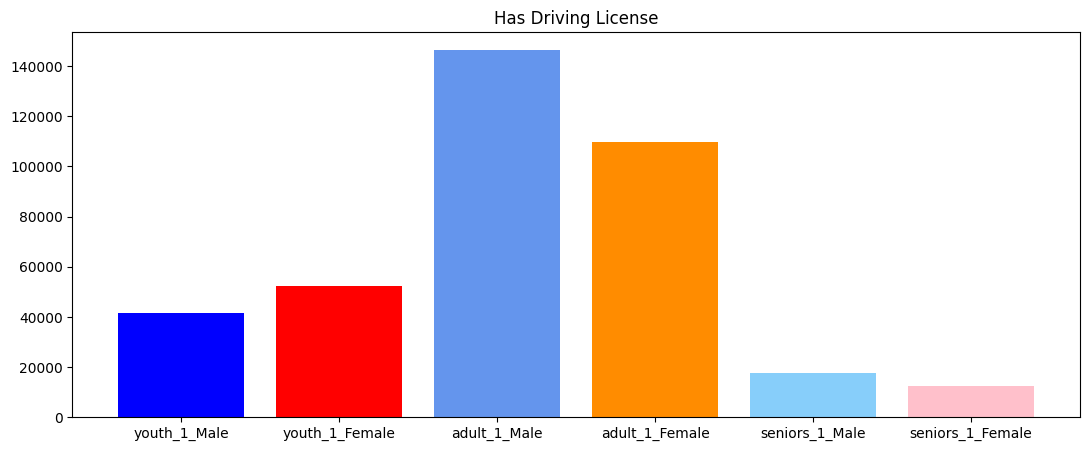

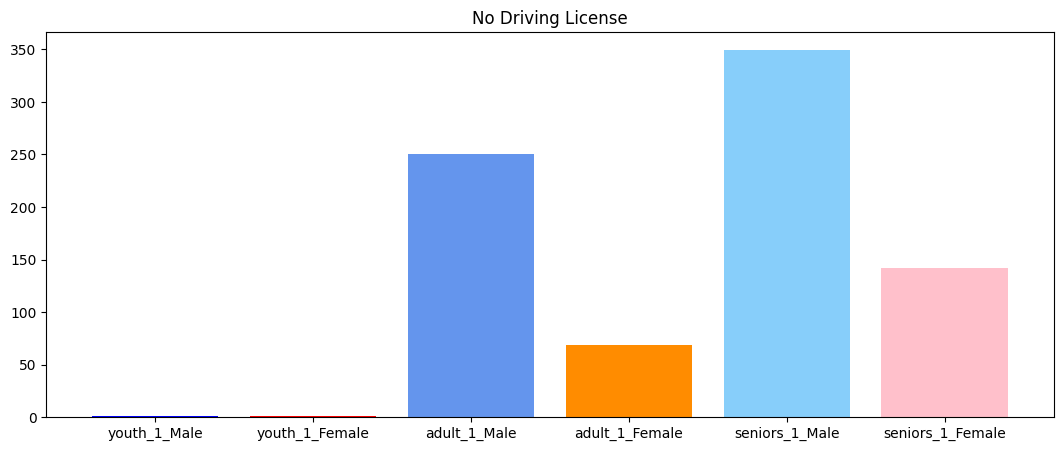

In [26]:
for i,ii in zip(x,['Has Driving License','No Driving License']):
    
    plt.figure(figsize=(13,5))
    plt.bar(list(x[i].keys())[2:]+list(c[i].keys())+list(z[i].keys())[2:],
            list(x[i].values())[2:]+list(c[i].values())+list(z[i].values())[2:],
            color=['blue','red','cornflowerblue','darkorange','lightskyblue','pink'])
    plt.title(ii)
    plt.show()

<font size =4>
    quite obviously, adult male and female both are more likely to have driving licence. on the other hand the seniors both male and female don't have driving license.<br><br>
    many youth does have driving licence, and very rarely they don't have one.

In [27]:
df['Region_Code'].value_counts().head(15)

28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
Name: Region_Code, dtype: int64

In [28]:
x = [[len(df[(df['Gender']=='Male') & (df['Previously_Insured']==1)]) , 
      len(df[(df['Gender']=='Male') & (df['Previously_Insured']==0)]) , 
      len(df[(df['Gender']=='Female') & (df['Previously_Insured']==1)]),
      len(df[(df['Gender']=='Female') & (df['Previously_Insured']==0)])],
     ['Male_insured','Male_uninsured','Female_insured','Female_uninsured']]

x

[[86679, 119410, 87949, 87071],
 ['Male_insured', 'Male_uninsured', 'Female_insured', 'Female_uninsured']]

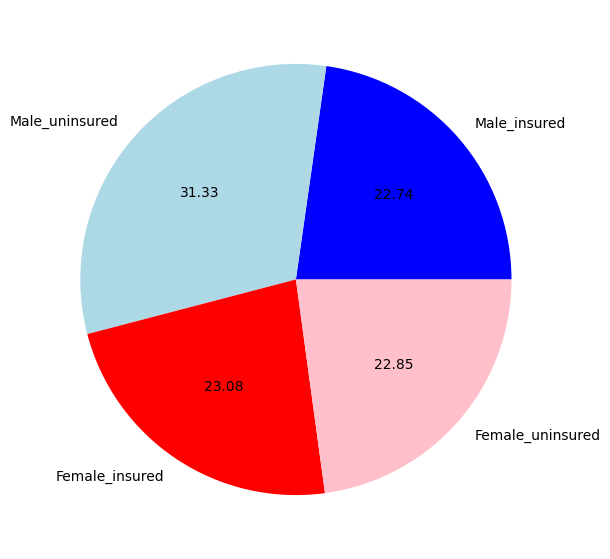

In [29]:
plt.figure(figsize=(7,7)) 
plt.pie(x[0],labels=x[1],colors=['blue','lightblue','red','pink'],autopct='%.2f')
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='count'>

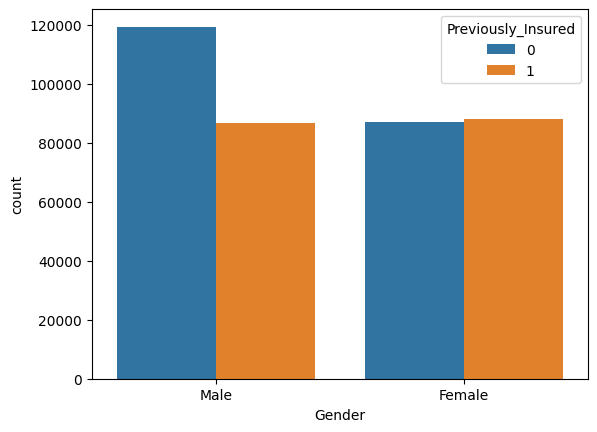

In [30]:
sns.countplot(data=df,x='Gender',hue='Previously_Insured')

In [31]:
x = compare_binary_3(df,'Gender','age_youth','Previously_Insured')
x

{'Previously_Insured_0': {'youth_0_Male': 103274,
  'youth_0_Female': 67905,
  'youth_1_Male': 16136,
  'youth_1_Female': 19166},
 'Previously_Insured_1': {'youth_0_Male': 61329,
  'youth_0_Female': 54732,
  'youth_1_Male': 25350,
  'youth_1_Female': 33217}}

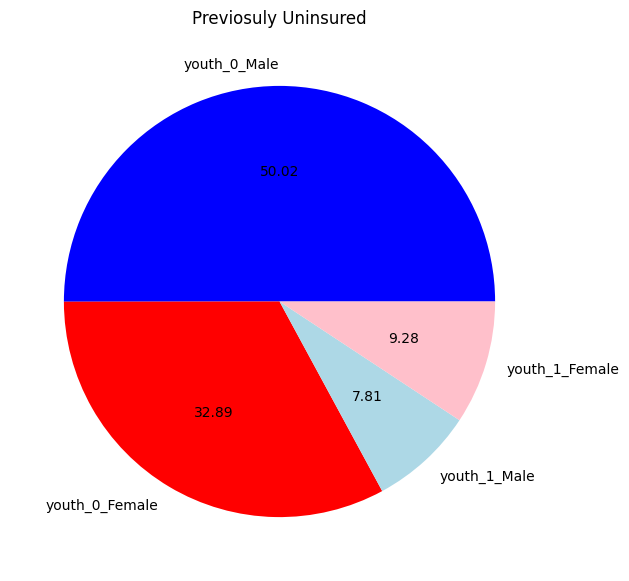

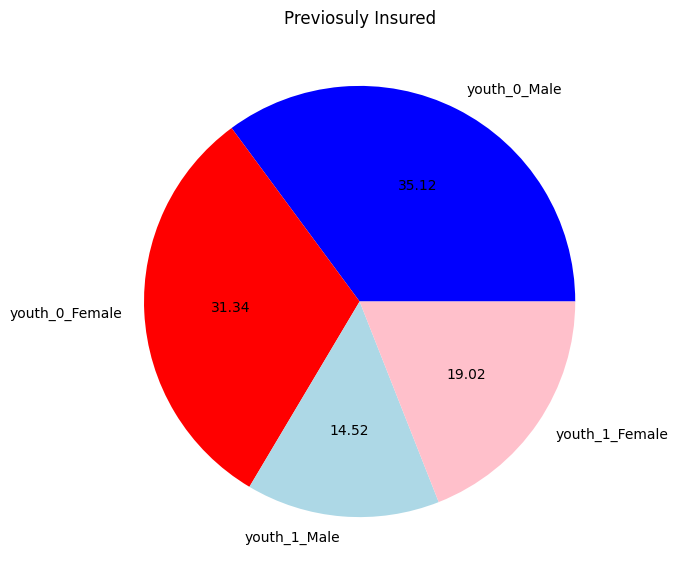

In [32]:
for i,ii in zip(x,['Previosuly Uninsured','Previosuly Insured']):
    
    plt.figure(figsize=(7,7))
    plt.pie(x[i].values(),labels=x[i].keys(),colors=['blue','red','lightblue','pink'],autopct='%.2f')
    plt.title(ii)
    plt.show()

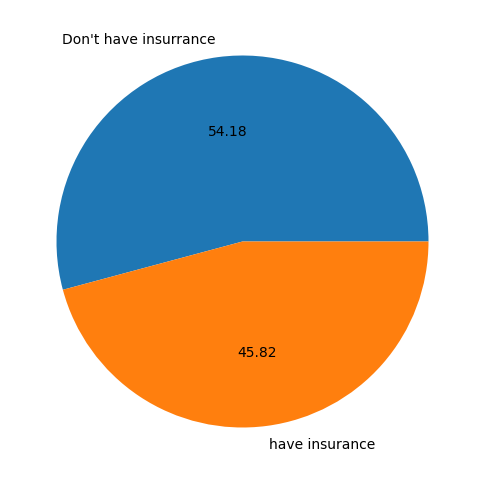

In [33]:
plt.figure(figsize=(6,7))
plt.pie(df['Previously_Insured'].value_counts(),labels=["Don't have insurrance",'have insurance'],autopct='%.2f')
plt.show()

<font size =4>
    there are more male that don't have vehicle insurance than insurred, and they are (the uninsurred) still more than female who are uninsurred.<br><br>
    the youth both male and female have vehicle insurrance (33%) even though the youth only comprise of 1/4 of the total customers, but female youth are more insurred than male.
    
### most importantly there are more vehicle uninsurred customers than insurred. this is a good opportunity for the company

<AxesSubplot: xlabel='Vehicle_Age', ylabel='count'>

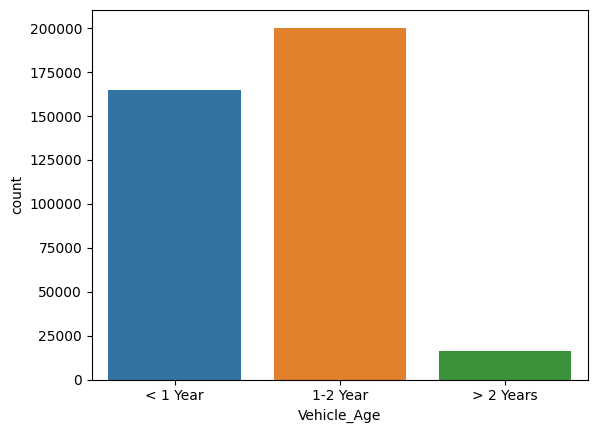

In [34]:
sns.countplot(df,x='Vehicle_Age',order=['< 1 Year', '1-2 Year','> 2 Years'])

<AxesSubplot: xlabel='Vehicle_Age', ylabel='count'>

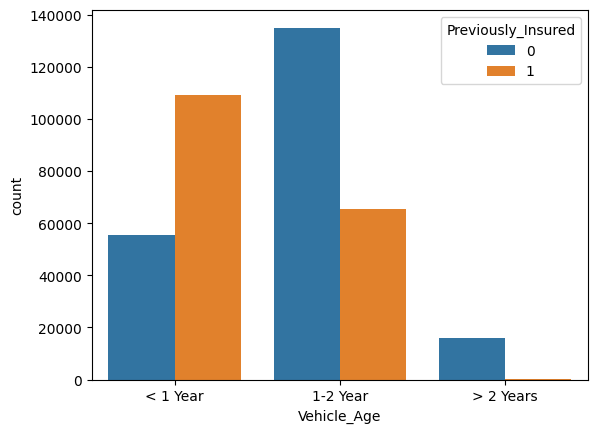

In [35]:
sns.countplot(data=df,x='Vehicle_Age',hue='Previously_Insured',order=['< 1 Year', '1-2 Year','> 2 Years'])

<font size =4>
    the vehicles of the customers are mostly 1-2 years old. and the vehicles that are less than an year old are more likely to be insurred than the vehicles that are older than 1 year.<br><br> 
    the older the vehicle, the lesser the probability that it is insurred.

<AxesSubplot: xlabel='Vehicle_Damage', ylabel='count'>

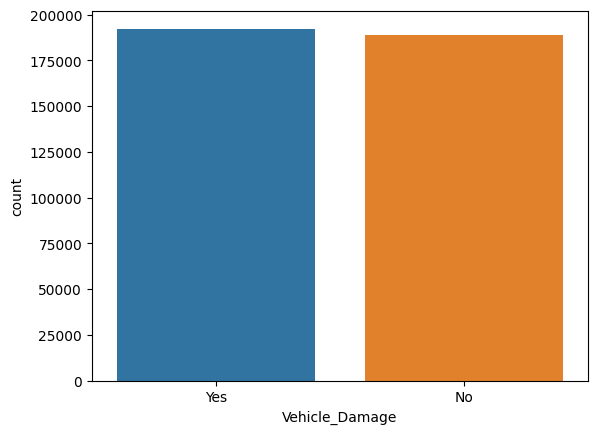

In [36]:
sns.countplot(df,x='Vehicle_Damage')

<AxesSubplot: xlabel='Vehicle_Damage', ylabel='count'>

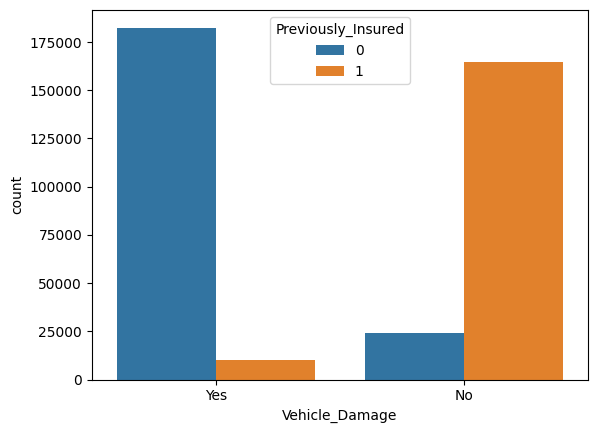

In [37]:
sns.countplot(df,x='Vehicle_Damage',hue='Previously_Insured')

<font size = 4>
    vehicle are evanly split between damaged and not damaged. but the customers that have vehicle insurance do not have much vehicle damage, and those who do have vehicle damage does't have insurance.<br><br>
    this is a good opportunity for the company to push and convince the customers that having a vehicle insurrance may lead to safety for their vehicles.<br><br>
    this may be because those people who are safer drivers take vehicle insurance as a precaution as they are by nature precautionary, and vice-versa.
    

In [38]:
df['Region_Code'].value_counts().head(15)

28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
Name: Region_Code, dtype: int64

In [39]:
lines = '''
    select Region_Code, 
    count(Vehicle_Damage='Yes' or NULL) as vehicle_damaged,
    count(Vehicle_Damage='No' or NULL) as vehicle_NOT_damage,
    count(Previously_Insured=1 or NULL) as previously_insured,
    count(df.Previously_Insured=0 or NULL) as Not_insured
    from df
    group by Region_Code order by previously_insured desc


'''

vehicle_damage_insured = sql(lines)

In [40]:
vehicle_damage_insured.head(10)

,Region_Code,vehicle_damaged,vehicle_NOT_damage,previously_insured,Not_insured
0,28,70236,36179,33182,73233
1,8,15536,18341,17107,16770
2,41,7606,10657,10313,7950
3,46,8859,10890,10293,9456
4,30,3819,8372,8220,3971
5,29,4189,6876,6568,4497
6,15,5831,7477,6271,7037
7,11,3303,5929,5718,3514
8,50,4229,6014,5614,4629
9,3,4426,4825,4521,4730


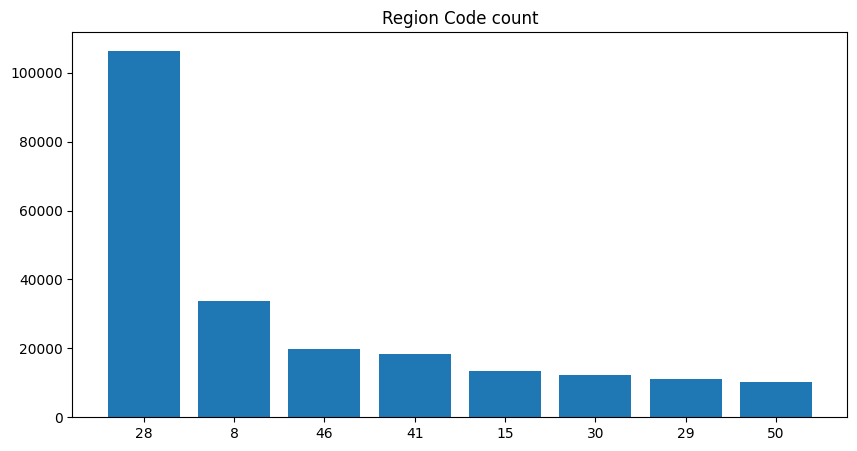

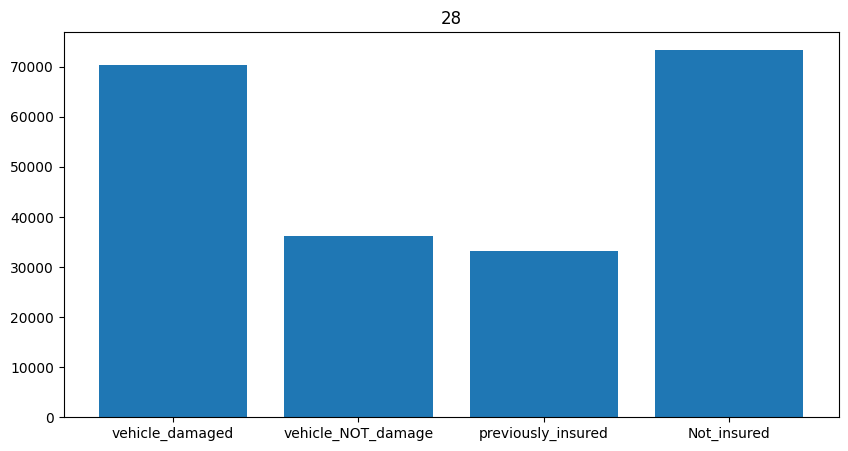

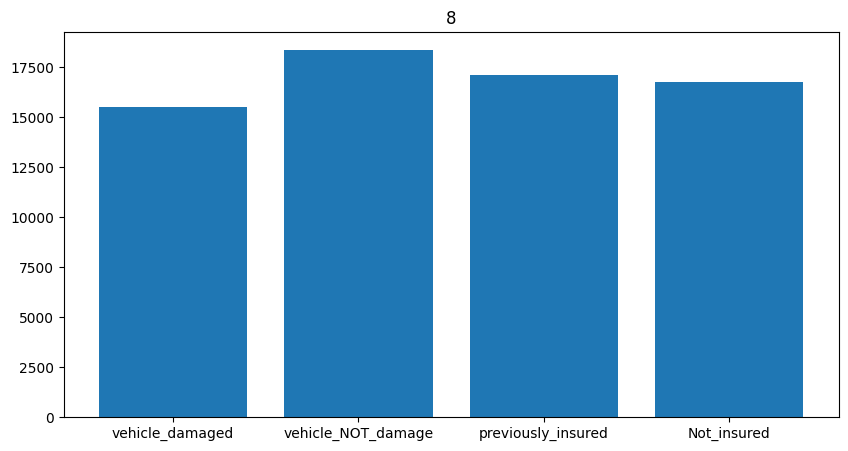

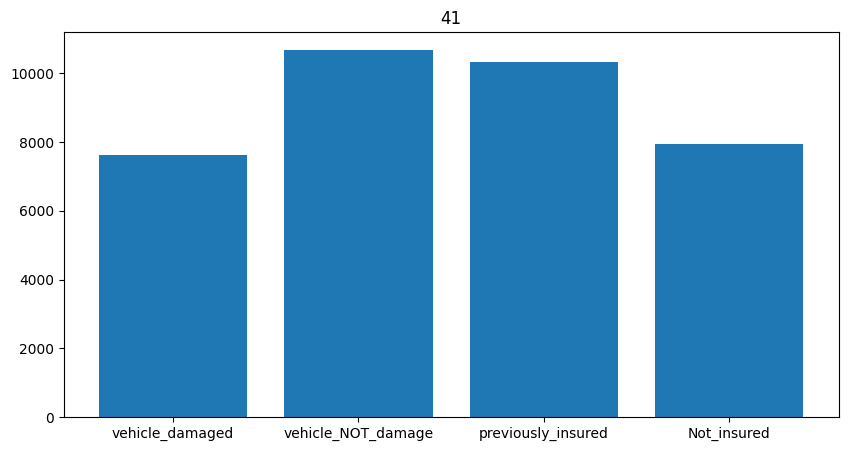

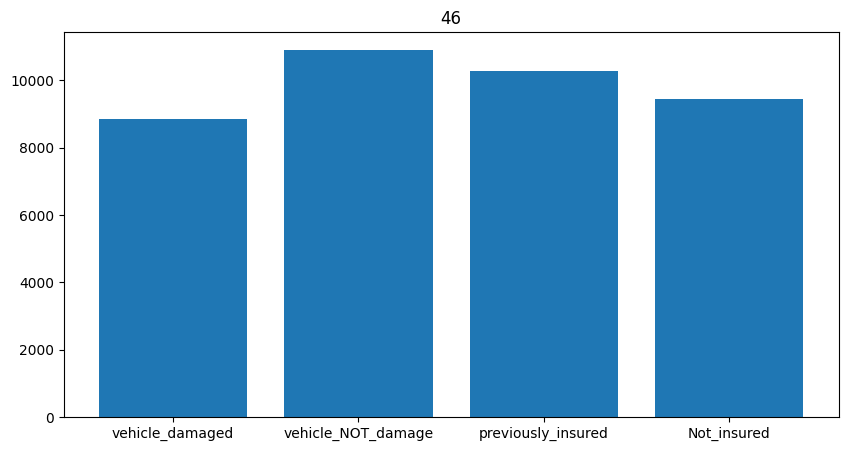

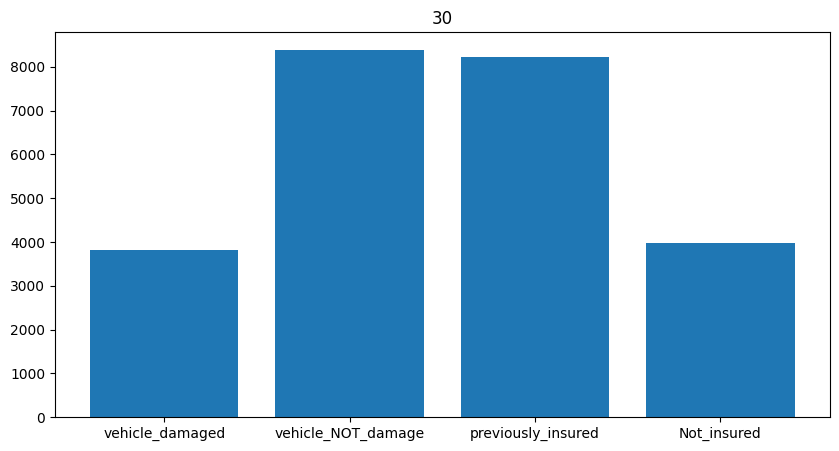

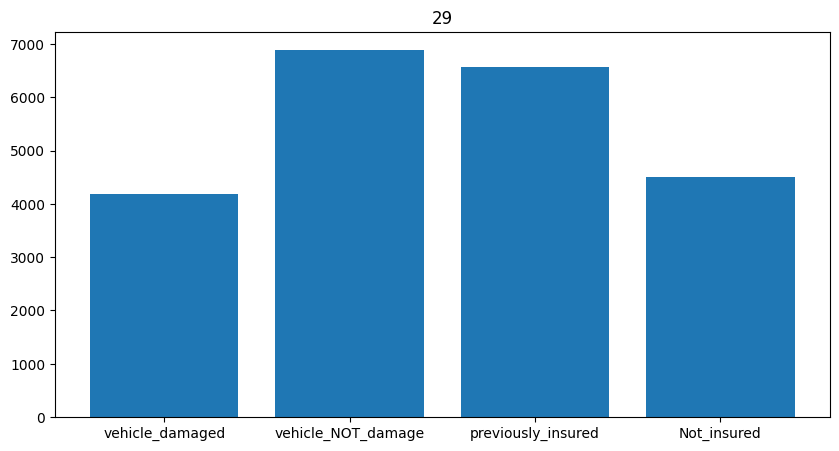

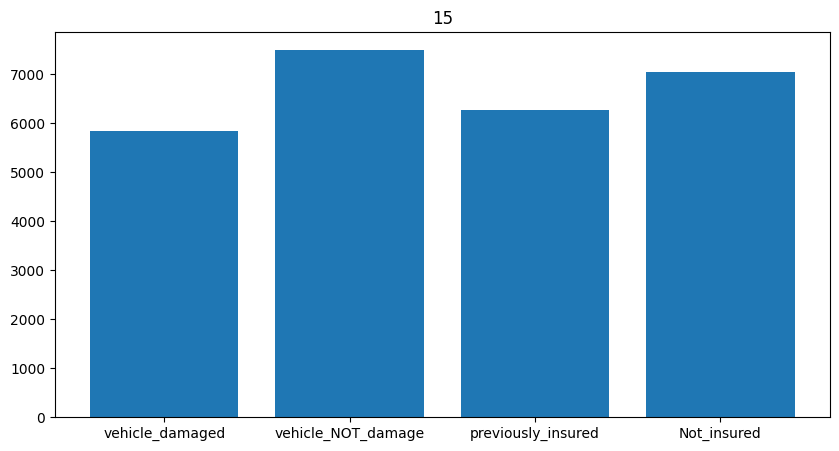

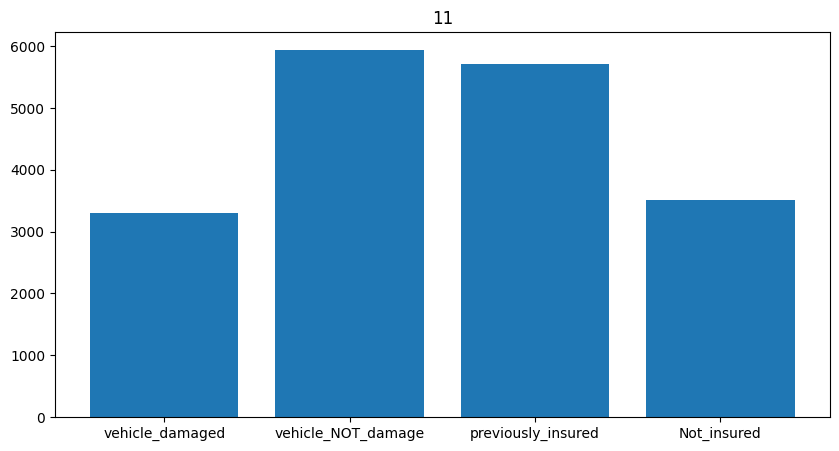

In [41]:
y = df['Region_Code'].value_counts().head(8)
x = [str(i) for i in y.index]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('Region Code count')
plt.show()

for i in range(8):
    y = vehicle_damage_insured.loc[i]
    x = list(y.index)
    
    plt.figure(figsize=(10,5))
    plt.bar(x[1:],y[1:])
    plt.title(y[0])
    plt.show()

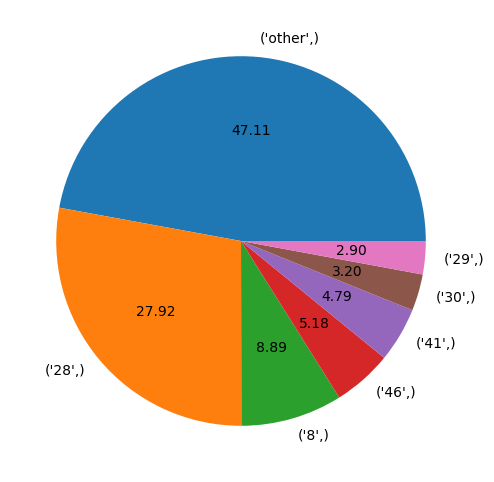

In [42]:
x = []
for i in df['Region_Code']:
    i = str(i)
    if i not in ['28', '8', '41', '46', '30', '29']:
        x.append('other')
    else:
        x.append(i)
x = pd.DataFrame(np.array(x)).value_counts()
plt.figure(figsize=(7,6))
plt.pie(x,labels=x.index,autopct='%.2f')
plt.show()

In [43]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

<BarContainer object of 2 artists>

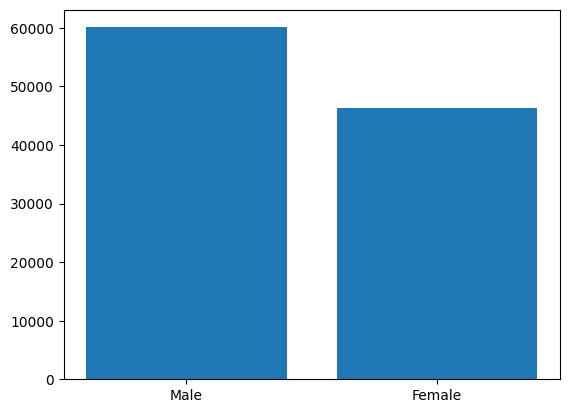

In [44]:
x = df[df['Region_Code']=='28']['Gender'].value_counts()
plt.bar(x.index,x)

<font size=4>
    the Region '28' has the most customers, has substatially damaged vehicles and among them most are not insured, which is a good opportunity for the company.

,Gender,Annual_Premium
0,Female,5337372814.000000
1,Male,6310991135.000000


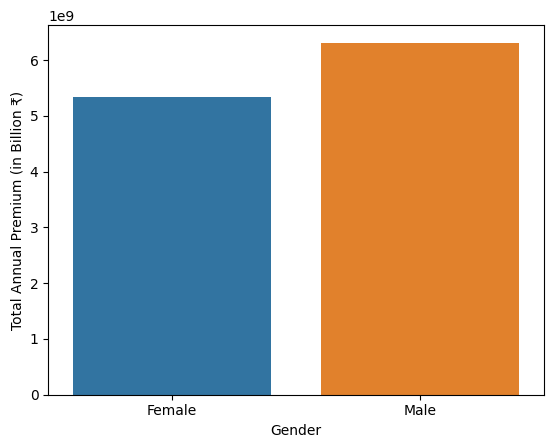

In [45]:
x = df[['Gender','Annual_Premium']].groupby('Gender',as_index=False).sum()
sns.barplot(data=x,x='Gender',y='Annual_Premium')
plt.ylabel('Total Annual Premium (in Billion ₹)')
x

,Gender,Annual_Premium
0,Female,30495.787990
1,Male,30622.649122


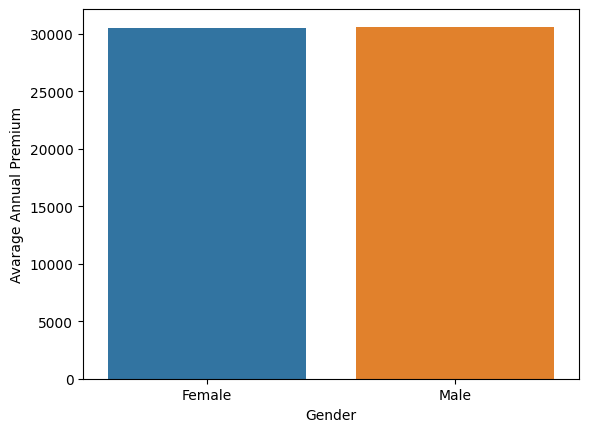

In [46]:
x = df[['Gender','Annual_Premium']].groupby('Gender',as_index=False).mean()
sns.barplot(data=x,x='Gender',y='Annual_Premium')
plt.ylabel('Avarage Annual Premium')
x

<font size =4>
    even thought the company has slightly more male customers, the female pay higher total annual premium. But if we look at the avarage then both male and female pay the same avarage annual premium 

,Previously_Insured,Annual_Premium
0,0,6297013015.000000
1,1,5351350934.000000


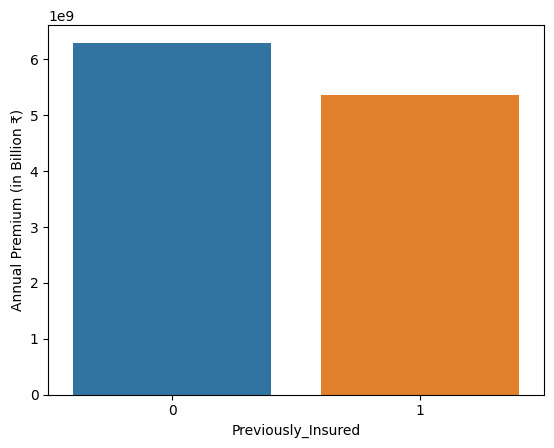

In [47]:
x = df[['Previously_Insured','Annual_Premium']].groupby('Previously_Insured',as_index=False).sum()
sns.barplot(data = x, x='Previously_Insured', y='Annual_Premium')
plt.ylabel('Annual Premium (in Billion ₹)')
x

<AxesSubplot: xlabel='Previously_Insured', ylabel='count'>

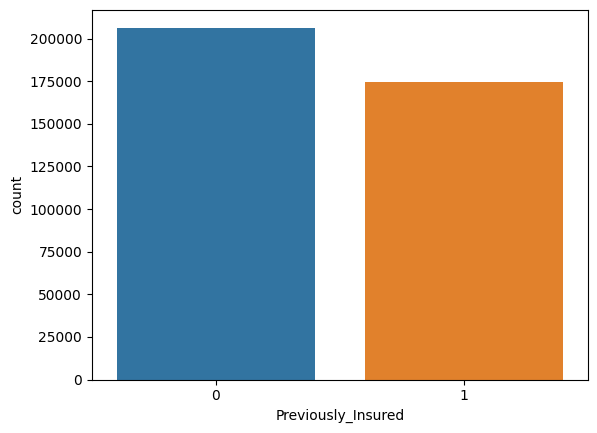

In [48]:
sns.countplot(data=df,x='Previously_Insured')

,Previously_Insured,Annual_Premium
0,0,30496.815760
1,1,30644.289198


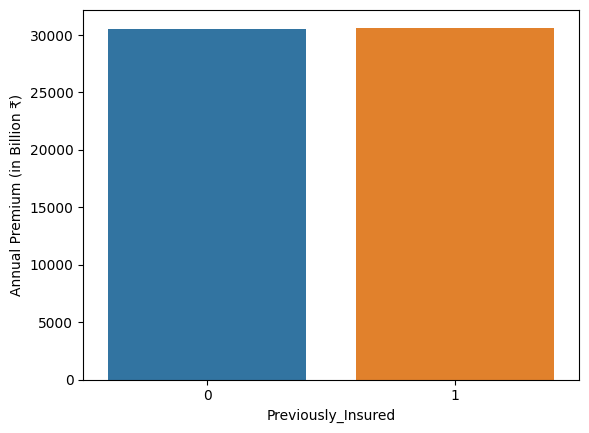

In [49]:
x = df[['Previously_Insured','Annual_Premium']].groupby('Previously_Insured',as_index=False).mean()
sns.barplot(data = x, x='Previously_Insured', y='Annual_Premium')
plt.ylabel('Annual Premium (in Billion ₹)')
x

<font size = 4>
    there are slightly more custorers that have vehicle insurance than those who don't

<AxesSubplot: xlabel='Vehicle_Damage', ylabel='Annual_Premium'>

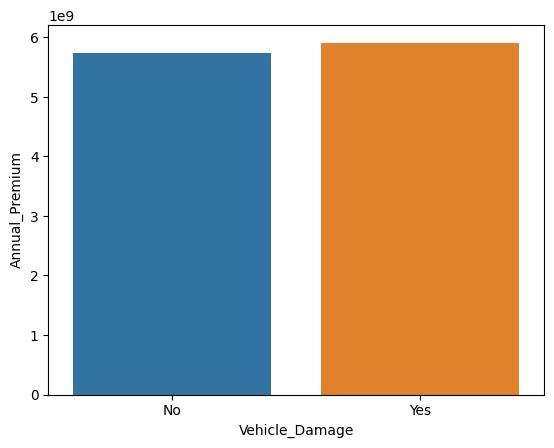

In [50]:
x = df[['Vehicle_Damage','Annual_Premium']].groupby('Vehicle_Damage',as_index=False).sum()
sns.barplot(data = x, x='Vehicle_Damage', y='Annual_Premium')

<AxesSubplot: xlabel='Age', ylabel='Annual_Premium'>

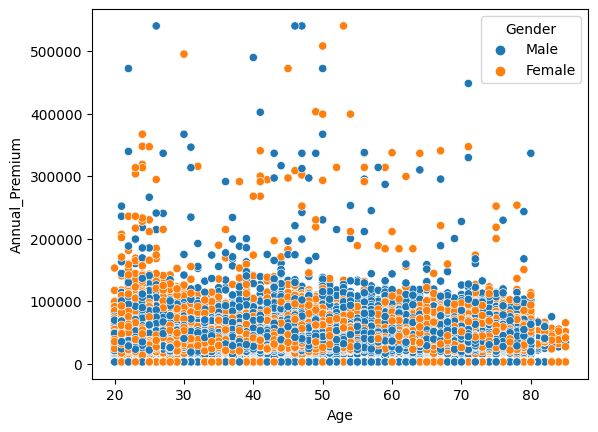

In [51]:
sns.scatterplot(data=df, x='Age', y='Annual_Premium',hue='Gender')

,Policy_Sales_Channel,count
0,152,134784
1,26,79700
2,124,73995
3,160,21779
4,156,10661
5,122,9930
6,157,6684
7,other,43576


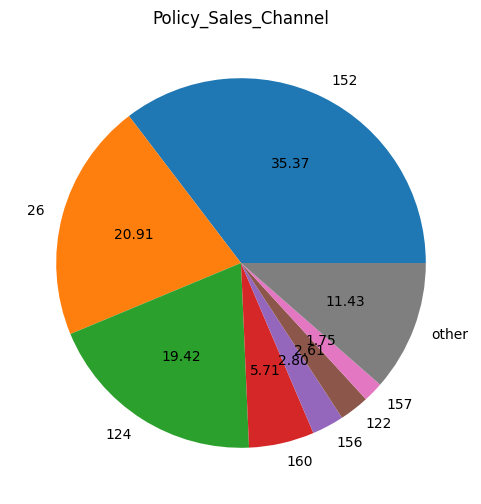

In [52]:
x = df['Policy_Sales_Channel'].value_counts()
x = pd.DataFrame([x.index,x],index=['Policy_Sales_Channel','count']).T
y = []
m = 0
p = list(df['Policy_Sales_Channel'].value_counts().head(7).index)
for i,n in zip(range(len(x)),x['Policy_Sales_Channel']):
    if n in p:
        y.append([n,x.loc[i]['count']])
    else:
        m = m+x.loc[i]['count']
y.append(['other',m])
x = pd.DataFrame(y,columns=['Policy_Sales_Channel','count'])

plt.figure(figsize=(6,6))
plt.pie(x['count'],labels=x['Policy_Sales_Channel'],autopct='%.2f')
plt.title('Policy_Sales_Channel')
x


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  age_youth             381109 non-null  int64  
 13  age_adult             381109 non-null  int64  
 14  age_seniors           381109 non-null  int64  
dtype

,Policy_Sales_Channel,Response
78,26,15891
28,124,13996
57,152,3858
61,156,2297
62,157,1794
26,122,1720
59,154,1474
67,163,880
66,160,475
60,155,395


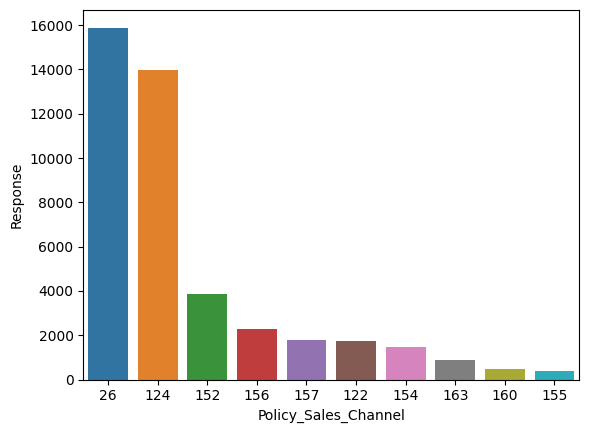

In [54]:
x = df[['Policy_Sales_Channel','Response']].groupby('Policy_Sales_Channel',as_index=False).sum().sort_values('Response',ascending=False).head(10)
sns.barplot(data=x,x='Policy_Sales_Channel',y='Response',estimator=sum)
x

<font size =4>
    35% of the customers where influenced using 152 Policy Sales Channel, followed by policy channels like 26 and 124. These three policy channels comprise of nearly 75% of policy sales channel. yet the sales channel 26 gave the best amount of responses.

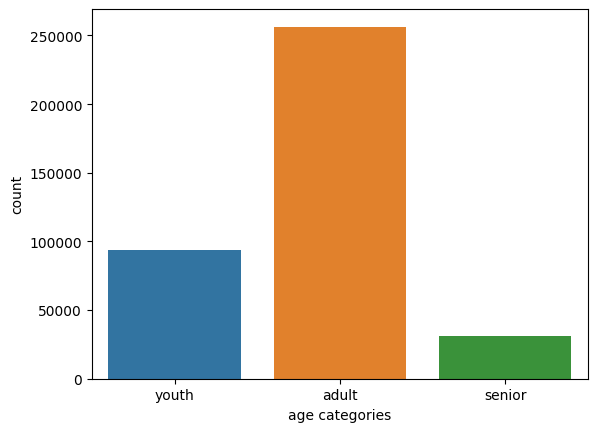

In [55]:
age_class = list(np.zeros(len(df)))
for i in ['age_youth','age_adult','age_seniors']:
    for n in range(len(df)):
        p = df[i].loc[n]
        if p == 0 and age_class[n]==0:
            pass
        elif p==0 and age_class[n]!=0:
            pass
        elif p==1 and age_class[n]==0:
            age_class[n]=i
            
x = pd.DataFrame(age_class).value_counts()
x.index = ['adult','youth','senior']
x = pd.DataFrame([list(x.index),x]).T

sns.barplot(data=x, x=0,y=1,order=['youth','adult','senior'])
plt.xlabel('age categories')
plt.ylabel('count')

plt.show()

In [56]:
x = pd.DataFrame(age_class).value_counts()

In [57]:
x.index = ['adult','youth','senior']

In [58]:

x = pd.DataFrame([list(x.index),x]).T
x

,0,1
0,adult,256380
1,youth,93869
2,senior,30860


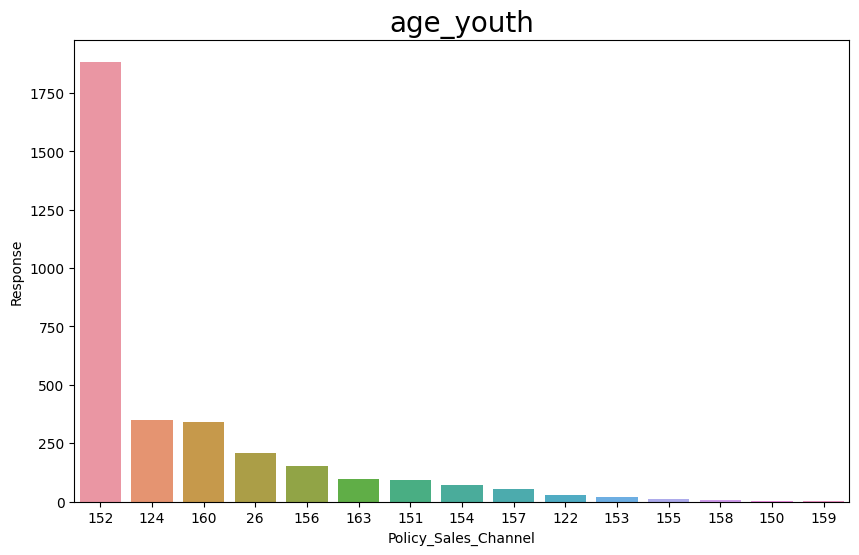

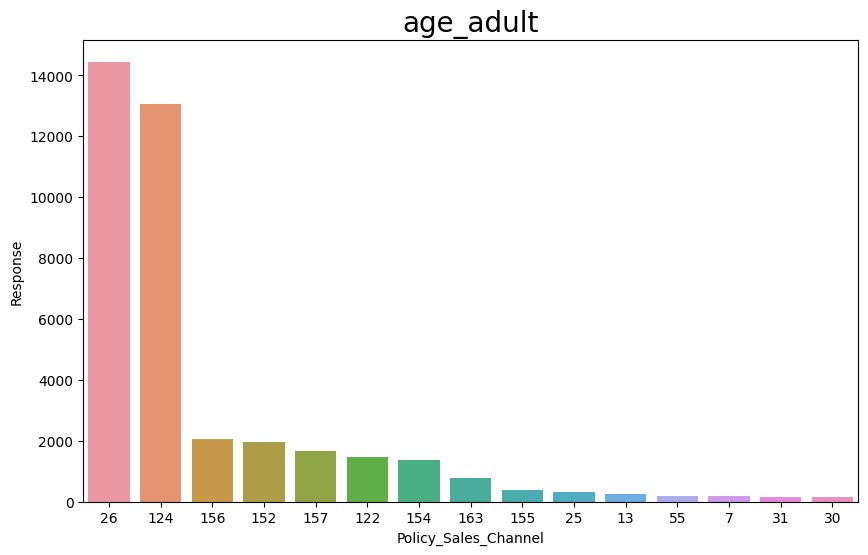

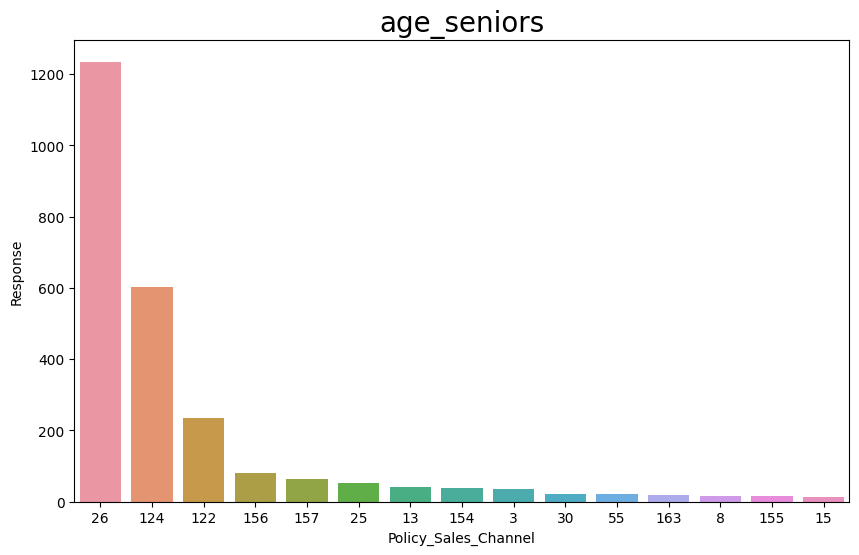

In [59]:
for i in ['age_youth','age_adult','age_seniors']:
    plt.figure(figsize=(10,6))
    sns.barplot(df[df[i]==1][['Policy_Sales_Channel','Response']].groupby('Policy_Sales_Channel',as_index=False).sum().sort_values('Response',ascending=False).head(15),x='Policy_Sales_Channel',y='Response')
    plt.title(i,fontdict={'fontsize':20})
    plt.show()

<font size =4>
1) youth are most effectively influenced by policy sales chaneel 152.<br>
2) sales channel 26 and 124 are most effective for adults.<br>
3) seniors are influenced the most by policy channel 26, followed by 124. <br>

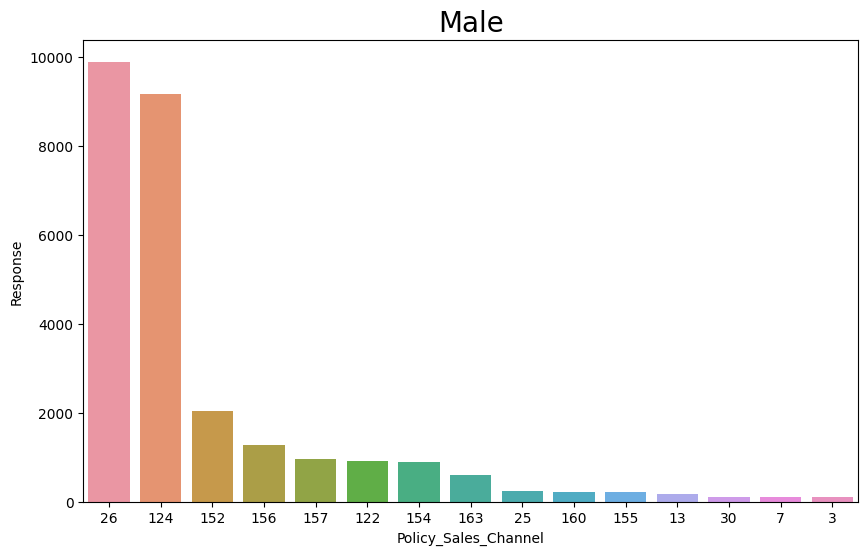

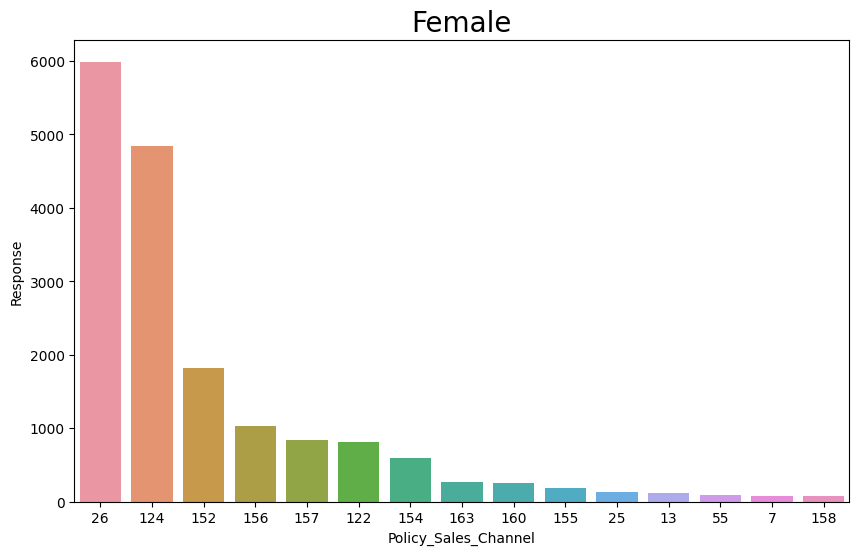

In [60]:
for i in ['Male','Female']:
    plt.figure(figsize=(10,6))
    sns.barplot(df[df['Gender']==i][['Policy_Sales_Channel','Response']].groupby('Policy_Sales_Channel',as_index=False).sum().sort_values('Response',ascending=False).head(15),x='Policy_Sales_Channel',y='Response')
    plt.title(i,fontdict={'fontsize':20})
    plt.show()

<font size = 4>
    both male and female customers are most influenced by policy sales channel 26 and 124.

<AxesSubplot: xlabel='Vintage', ylabel='Annual_Premium'>

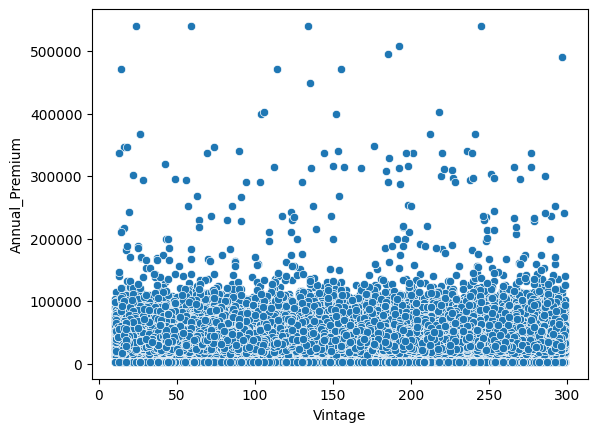

In [61]:
sns.scatterplot(df,x='Vintage',y='Annual_Premium')

<AxesSubplot: xlabel='Vintage', ylabel='Age'>

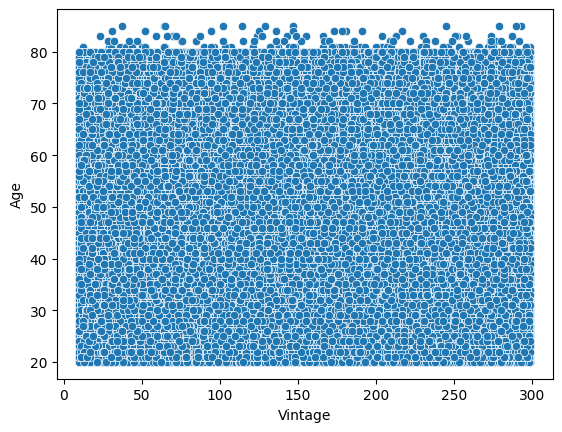

In [62]:
sns.scatterplot(df,x='Vintage',y='Age')

<AxesSubplot: xlabel='Vintage', ylabel='Count'>

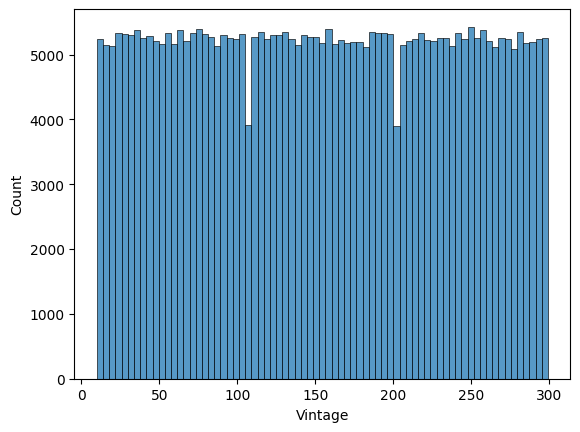

In [63]:
sns.histplot(data=df,x='Vintage')

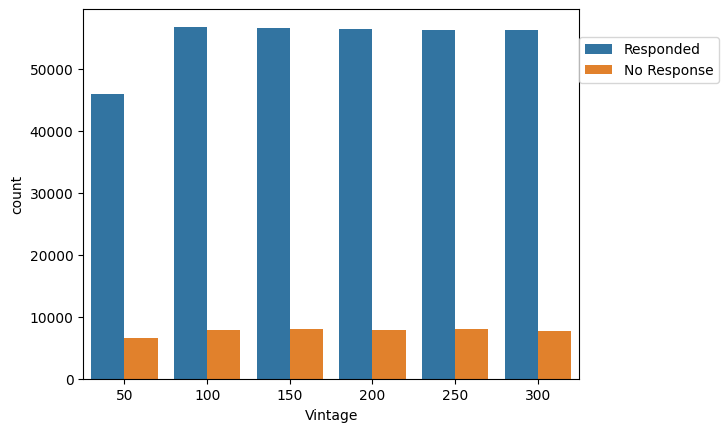

In [64]:
x = []
y = df[['Response']].copy()
for i in df['Vintage']:
    if i <50:
        x.append('50')
    elif i>50 and i<100:
        x.append('100')
    elif i>100 and i<150:
        x.append('150')
    elif i>150 and i<200:
        x.append('200')
    elif i>200 and i<250:
        x.append('250')
    elif i>250:
        x.append('300')
    else:
        x.append(np.nan)
        
y['Vintage'] = x

sns.countplot(data=y,x='Vintage',hue='Response',order='50 100 150 200 250 300'.split(' '))
plt.legend(loc=(1,0.8),labels=['Responded','No Response'])
plt.show()

<font size =4>
    the vintage, how many days the customer is with the company, doesn't seem to have any linear correlation with annual premium or age. Nor does the old customers have any significant inclination to respond to the policy sales channels

In [65]:
df[['Region_Code','Vintage']].groupby('Region_Code',as_index=False).sum().sort_values('Vintage',ascending=False).head(15)

,Region_Code,Vintage
21,28,16430153
51,8,5250423
41,46,3041984
36,41,2829543
7,15,2064426
24,30,1859987
22,29,1689051
46,50,1563627
23,3,1435861
3,11,1427339


<AxesSubplot: xlabel='Region_Code', ylabel='Vintage'>

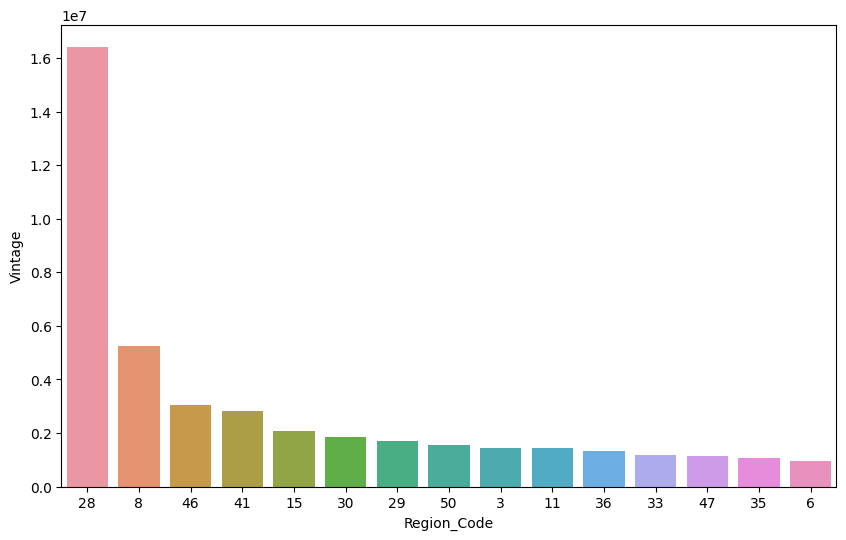

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(data=df[['Region_Code','Vintage']].groupby('Region_Code',as_index=False).sum().sort_values('Vintage',ascending=False).head(15),x='Region_Code',y='Vintage')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  age_youth             381109 non-null  int64  
 13  age_adult             381109 non-null  int64  
 14  age_seniors           381109 non-null  int64  
dtype

In [68]:
submission_df = pd.read_csv('test.csv')
submission_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.000000,1,< 1 Year,No,35786.000000,152.000000,53
1,381111,Male,40,1,28.000000,0,1-2 Year,Yes,33762.000000,7.000000,111
2,381112,Male,47,1,28.000000,0,1-2 Year,Yes,40050.000000,124.000000,199
3,381113,Male,24,1,27.000000,1,< 1 Year,Yes,37356.000000,152.000000,187
4,381114,Male,27,1,28.000000,1,< 1 Year,No,59097.000000,152.000000,297


In [69]:
df['id'].nunique()

381109

In [70]:
df['Response'].value_counts()[1] / df['Response'].value_counts()[0]

0.13968343206767964

<BarContainer object of 2 artists>

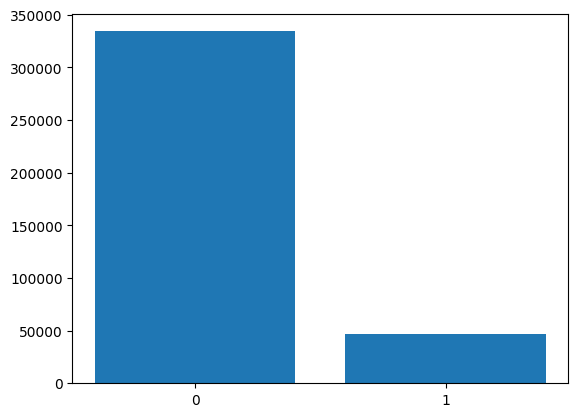

In [71]:
plt.bar(['0','1'],df['Response'].value_counts())

## Resampling and Scalling of the Data

<font size = 4>
    the responses to the policy sales channels gives us an unbalanced data, which is not an ideal situation for classification, as a class that dominates may disrupt the loss fucntion and give us a result that may seem promising but when it isn't.<br><br>
    therefore we need to resample the data, and make these classes equally present in the dataset before we put it in the ANN model.<br><br>
    we will just make duplicate records of the positive responses to match those which are negative. But if we just duplicated all the data and then made a train test split then we will effectively give the ANN model all the positive responses available to us, which would make train test split irrelavant.<br><br>
    to overcome this we will first take out some data for testing and then we will resample the remaining data for ANN model.

In [72]:
run_models = False

In [73]:
def resampling(x_data,y_data,x_size,y_size):
    
    '''
    x_data : larger dataset
    y_data : smaller dataset
    x_size : x_data size of resample
    y_size : y_data size of resample
    
    '''
    
    
    final_df = pd.concat([x_data,y_data],axis=0)
    
    temp = pd.DataFrame(columns=final_df.columns)

    for i in final_df['Region_Code'].unique():
        temp = pd.concat([temp,final_df.loc[random.sample(sorted(final_df[final_df['Region_Code'] == i].index),10)]]
                        , axis=0)
        
        
    for i in final_df['Policy_Sales_Channel'].unique():
        try:
            temp = pd.concat([temp,final_df.loc[random.sample(sorted(final_df[final_df['Policy_Sales_Channel'] == i].index),10)]]
                            , axis=0)
        except:
            temp = pd.concat([temp,final_df.loc[random.sample(sorted(final_df[final_df['Policy_Sales_Channel'] == i].index),1)]]
                            , axis=0)

    
    
    x_size = round(len(y_data)*(2-(y_size / x_size))*y_size)
    if x_size > len(x_data):
        x_size = len(x_data)
    
    print(x_size)
    x_data.reset_index(drop=True,inplace=True)
    y_data.reset_index(drop=True,inplace=True)
    
    
    y_col = y_data.columns
    
    y = pd.DataFrame(list(y_data.values)*int(y_size),columns=y_col)
    
    y_remain = random.sample(range(0,len(y_data)),round(len(y_data)*float('0.'+str(y_size).split('.')[1])))
    
    y = pd.concat([y,y_data.loc[y_remain]],axis=0)
    
    
    x_remain = random.sample(range(0,len(x_data)),x_size)
    
    x = x_data.loc[x_remain]
    
    df = pd.concat([x,y,temp],axis=0)
    
    df.reset_index(drop=True,inplace=True)
    
    df_mix = random.sample(range(0,len(df)),len(df))
    df = df.loc[df_mix]
    df.reset_index(drop=True,inplace=True)
    
  
    return df

In [74]:
x = df.copy()
    
if run_models == True:

    x_index = random.sample(sorted(x[x['Response']==1].index),6000) + random.sample(sorted(x[x['Response']==0].index),8000)

    test_df = x.loc[list(x_index)]

    with open('data/test_df','wb') as file:
        pickle.dump(test_df,file,pickle.HIGHEST_PROTOCOL)

else:
    with open('data/test_df','rb') as file:
        test_df = pickle.load(file)
    
x.drop(index=test_df.index,inplace=True)
x.reset_index(inplace=True,drop=True)

x = x.drop(columns=['id'])

final_df = resampling(x[x['Response']==0],x[x['Response']==1],3.5,3.0)


# final_df = resampling(df[df['Response']==0],df[df['Response']==1],2.35,2.01)
# final_df = x
final_df.head()

139577


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_youth,age_adult,age_seniors
0,Female,63,1,28,0,1-2 Year,Yes,26814.000000,26,63,1,0,1,0
1,Male,23,1,29,1,< 1 Year,No,41938.000000,152,178,0,1,0,0
2,Male,34,1,1,1,1-2 Year,No,2630.000000,26,51,0,0,1,0
3,Male,52,1,8,0,1-2 Year,Yes,52122.000000,124,141,0,0,1,0
4,Male,63,1,28,0,1-2 Year,Yes,34330.000000,26,50,1,0,1,0


In [75]:
categorical_data

['Gender',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Region_Code',
 'Policy_Sales_Channel']

In [76]:
df['Response'].value_counts()[1], final_df['Response'].value_counts()[1]

(46710, 122303)

In [77]:
list(df['Response'].value_counts())

[334399, 46710]

In [78]:
list(final_df['Response'].value_counts())

[141115, 122303]

<BarContainer object of 4 artists>

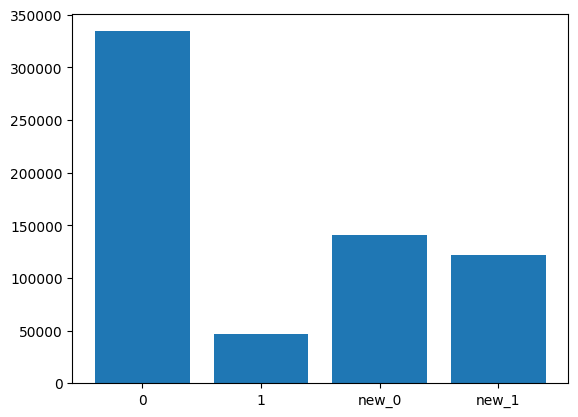

In [79]:
plt.bar(['0','1','new_0','new_1'],list(df['Response'].value_counts())+list(final_df['Response'].value_counts()))

<font size = 4>
    final dataset after resampling

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263418 entries, 0 to 263417
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                263418 non-null  object 
 1   Age                   263418 non-null  object 
 2   Driving_License       263418 non-null  object 
 3   Region_Code           263418 non-null  object 
 4   Previously_Insured    263418 non-null  object 
 5   Vehicle_Age           263418 non-null  object 
 6   Vehicle_Damage        263418 non-null  object 
 7   Annual_Premium        263418 non-null  float64
 8   Policy_Sales_Channel  263418 non-null  object 
 9   Vintage               263418 non-null  object 
 10  Response              263418 non-null  object 
 11  age_youth             263418 non-null  object 
 12  age_adult             263418 non-null  object 
 13  age_seniors           263418 non-null  object 
dtypes: float64(1), object(13)
memory usage: 28.1+ MB


In [81]:
categorical_unique = {}

for i in categorical_data:
    
    categorical_unique[i] = [i+'_'+ii for ii in df[i].unique()]
categorical_unique

{'Gender': ['Gender_Male', 'Gender_Female'],
 'Vehicle_Age': ['Vehicle_Age_> 2 Years',
  'Vehicle_Age_1-2 Year',
  'Vehicle_Age_< 1 Year'],
 'Vehicle_Damage': ['Vehicle_Damage_Yes', 'Vehicle_Damage_No'],
 'Region_Code': ['Region_Code_28',
  'Region_Code_3',
  'Region_Code_11',
  'Region_Code_41',
  'Region_Code_33',
  'Region_Code_6',
  'Region_Code_35',
  'Region_Code_50',
  'Region_Code_15',
  'Region_Code_45',
  'Region_Code_8',
  'Region_Code_36',
  'Region_Code_30',
  'Region_Code_26',
  'Region_Code_16',
  'Region_Code_47',
  'Region_Code_48',
  'Region_Code_19',
  'Region_Code_39',
  'Region_Code_23',
  'Region_Code_37',
  'Region_Code_5',
  'Region_Code_17',
  'Region_Code_2',
  'Region_Code_7',
  'Region_Code_29',
  'Region_Code_46',
  'Region_Code_27',
  'Region_Code_25',
  'Region_Code_13',
  'Region_Code_18',
  'Region_Code_20',
  'Region_Code_49',
  'Region_Code_22',
  'Region_Code_44',
  'Region_Code_0',
  'Region_Code_9',
  'Region_Code_31',
  'Region_Code_12',
  'Region

In [82]:
def get_dummy(df,columns):
    
    data = pd.DataFrame()
    
    x = df.copy()
    for cat in columns:
        m = []
        y = pd.get_dummies(x[cat])
        new_col = y.columns
        
        for i in categorical_unique[cat]:
            if i in new_col:
                m.append(y[i])
                
            else:
                m.append(np.zeros(len(x)))
                
        m = pd.DataFrame(m).T
        m.columns = categorical_unique[cat]
        
        data = pd.concat([data,m],axis=1)
    
    x = x.drop(columns=columns)
    data = pd.concat([x,data],axis=1)
    data = data.astype(np.float64)
        
    print(data.dtypes)
    data.replace(np.nan, 0,inplace=True)
    

    return data

In [83]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code              object
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                   int64
Response                  int64
age_youth                 int64
age_adult                 int64
age_seniors               int64
dtype: object

In [84]:
data = get_dummy(final_df,categorical_data)

Age                         float64
Driving_License             float64
Previously_Insured          float64
Annual_Premium              float64
Vintage                     float64
                             ...   
Policy_Sales_Channel_6      float64
Policy_Sales_Channel_50     float64
Policy_Sales_Channel_144    float64
Policy_Sales_Channel_143    float64
Policy_Sales_Channel_41     float64
Length: 224, dtype: object


In [85]:
data = data.astype(np.float64)
for i in data.columns:
    if data[i].dtype == 'O':
        print(i)

In [86]:
data.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,age_youth,age_adult,age_seniors,Gender_Male,...,Policy_Sales_Channel_33,Policy_Sales_Channel_74,Policy_Sales_Channel_102,Policy_Sales_Channel_149,Policy_Sales_Channel_43,Policy_Sales_Channel_6,Policy_Sales_Channel_50,Policy_Sales_Channel_144,Policy_Sales_Channel_143,Policy_Sales_Channel_41
0,63.000000,1.000000,0.000000,26814.000000,63.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,23.000000,1.000000,1.000000,41938.000000,178.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,34.000000,1.000000,1.000000,2630.000000,51.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,52.000000,1.000000,0.000000,52122.000000,141.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,63.000000,1.000000,0.000000,34330.000000,50.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
X = data.drop(columns='Response')
y = data['Response']

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [89]:
scalar = StandardScaler()

In [90]:
X = scalar.fit_transform(X)
# X = scalar.transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

## ANN Model with Tensorflow

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared

In [93]:
callback = EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)


opt = Adam(learning_rate=0.0001)

<font size =4>
    first we will check out what number of hidden layers are efficient at classification. For saving some time, we will only run those models for around 20 epochs

In [94]:
if run_models == True:

    record = {}

    epo = 40
    for hidden_layers in [2,4,6,10,11,12,14,16]:
        for neurons in [50,100,220]:
            model = Sequential()

            print('\n\n','model_'+str(hidden_layers)+'_neu_'+str(neurons),'\n\n\n')

            n = 0

            model.add(Dense(units=neurons, kernel_initializer='he_uniform', activation='relu',input_dim=X.shape[1]))

            for i in range(hidden_layers-1):
                if n <= hidden_layers/2 and neurons*0.6 > 2:
                    model.add(Dense(units=neurons*0.6, kernel_initializer='he_uniform', activation='relu'))

                elif n <= hidden_layers/2 and neurons*0.6 <= 2:
                    model.add(Dense(units=neurons, kernel_initializer='he_uniform', activation='relu'))

                else:
                    model.add(Dense(units=neurons*1.4, kernel_initializer='he_uniform', activation='relu'))

                n+=1

            model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

            model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

            save_hist = model.fit(X_train, y_train, validation_split=0.30, epochs=epo)



            record['model_'+str(hidden_layers)+'_neu_'+str(neurons)] = save_hist.history
    
    with open('data/record','wb') as file:
        pickle.dump(record,file,pickle.HIGHEST_PROTOCOL)
    
else:
    with open('data/record','rb') as file:
        record = pickle.load(file)


In [95]:
record.keys()

dict_keys(['model_2_neu_50', 'model_2_neu_100', 'model_2_neu_220', 'model_4_neu_50', 'model_4_neu_100', 'model_4_neu_220', 'model_6_neu_50', 'model_6_neu_100', 'model_6_neu_220', 'model_10_neu_50', 'model_10_neu_100', 'model_10_neu_220', 'model_11_neu_50', 'model_11_neu_100', 'model_11_neu_220', 'model_12_neu_50', 'model_12_neu_100', 'model_12_neu_220', 'model_14_neu_50', 'model_14_neu_100', 'model_14_neu_220', 'model_16_neu_50', 'model_16_neu_100', 'model_16_neu_220'])

In [96]:
x = [1,2,3,4,5,6]

In [97]:
np.ones(2)

array([1., 1.])

In [98]:
def moving_avarage(x,b):
    y = [x[0]]
    z = x[0]
    for i in x[1:]:
        z = (b*z)+((1-b)*i)
        y.append(z)
    return y
        

In [99]:
moving_avarage(x,0.5)

[1, 1.5, 2.25, 3.125, 4.0625, 5.03125]

In [100]:
record['model_2_neu_50']

{'loss': [0.48384565114974976,
  0.45831847190856934,
  0.4578491151332855,
  0.4575006365776062,
  0.4572581648826599,
  0.4571133852005005,
  0.4569324851036072,
  0.4567684531211853,
  0.4566606879234314,
  0.4565565288066864,
  0.45644769072532654,
  0.456270694732666,
  0.4561814069747925,
  0.4561660885810852,
  0.4561476409435272,
  0.4560016691684723,
  0.4559646248817444,
  0.4559720456600189,
  0.4559444189071655,
  0.4558965265750885,
  0.45587170124053955,
  0.45583680272102356,
  0.4558098018169403,
  0.4557558000087738,
  0.4557480216026306,
  0.455655038356781,
  0.45574888586997986,
  0.455667644739151,
  0.45564961433410645,
  0.455538809299469,
  0.45568108558654785,
  0.45568475127220154,
  0.4556315243244171,
  0.4555954933166504,
  0.4555985629558563,
  0.4555458426475525,
  0.45560821890830994,
  0.455524206161499,
  0.4554954767227173,
  0.45552486181259155],
 'accuracy': [0.756236732006073,
  0.7608757615089417,
  0.7615181803703308,
  0.761551558971405,
  0.761

In [101]:
x = pd.DataFrame(columns=['model','accuracy','val_accuracy'])

for i in record.keys():
    x.loc[len(x)]=[i,round(max(record[i]['accuracy'][-5:])*100,5),round(max(record[i]['val_accuracy'][-5:])*100,5)]

x['mean_accuracy'] = (x['accuracy']+x['val_accuracy'])/2
x.sort_values(by='mean_accuracy',ascending=False,inplace=True)
x

,model,accuracy,val_accuracy,mean_accuracy
8,model_6_neu_220,76.304500,76.233770,76.269135
9,model_10_neu_50,76.310340,76.216250,76.263295
7,model_6_neu_100,76.267790,76.253240,76.260515
16,model_12_neu_100,76.272800,76.239610,76.256205
21,model_16_neu_50,76.242760,76.266860,76.254810
20,model_14_neu_220,76.278640,76.229880,76.254260
5,model_4_neu_220,76.286150,76.216250,76.251200
12,model_11_neu_50,76.251940,76.249340,76.250640
10,model_10_neu_100,76.301170,76.198730,76.249950
6,model_6_neu_50,76.289490,76.204570,76.247030


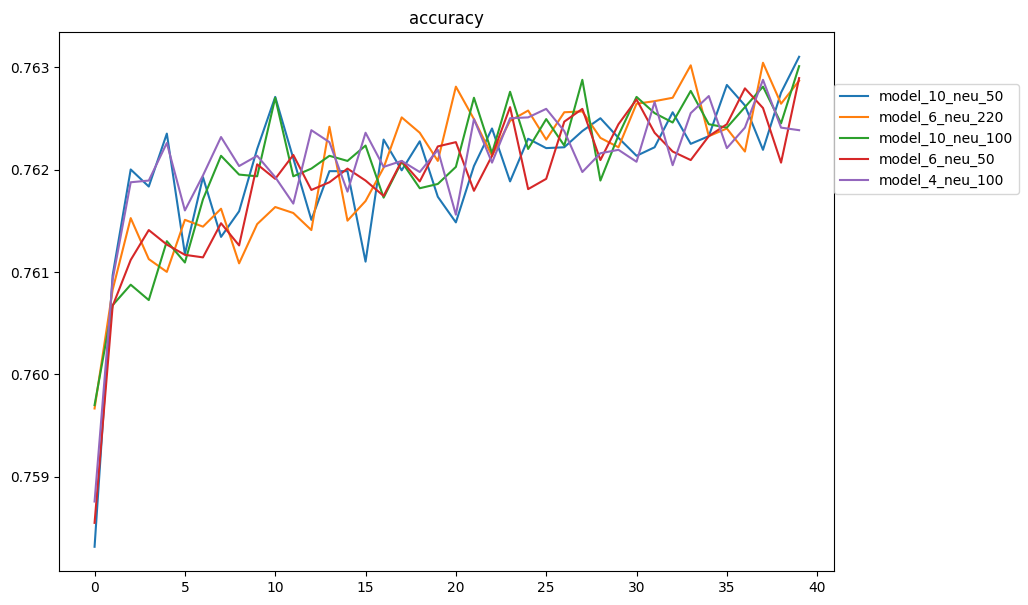

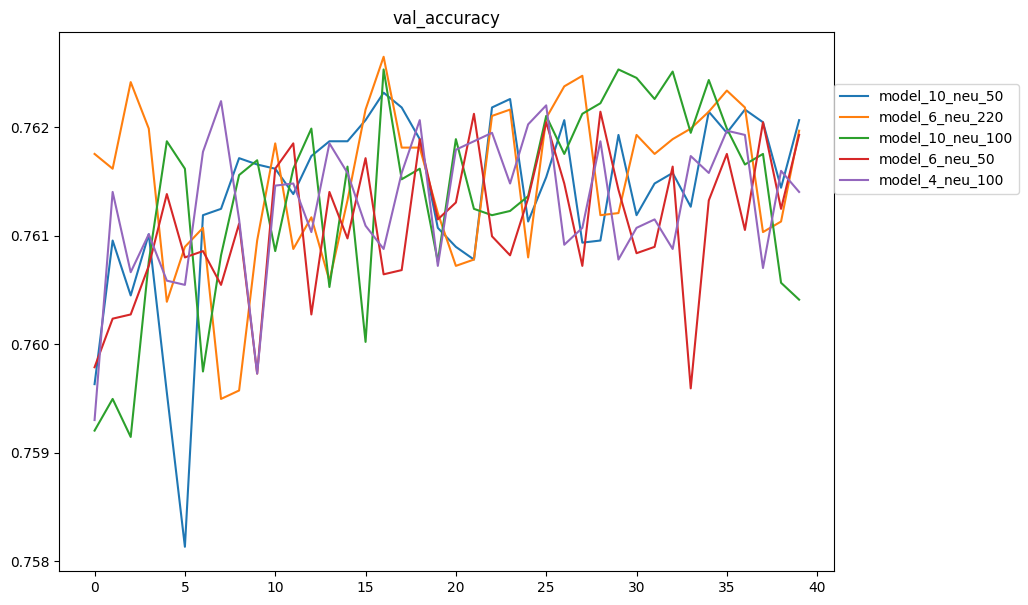

accuracy top 5 
 9      model_10_neu_50
8      model_6_neu_220
10    model_10_neu_100
6       model_6_neu_50
4      model_4_neu_100
Name: model, dtype: object 


val_accuracy top 5 
 21     model_16_neu_50
7      model_6_neu_100
12     model_11_neu_50
16    model_12_neu_100
15     model_12_neu_50
Name: model, dtype: object


/tmp/ipykernel_176833/1238169311.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('accuracy top 5 \n',x['model'][:5],'\n\n')
/tmp/ipykernel_176833/1238169311.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('val_accuracy top 5 \n',x['model'][:5])


[]

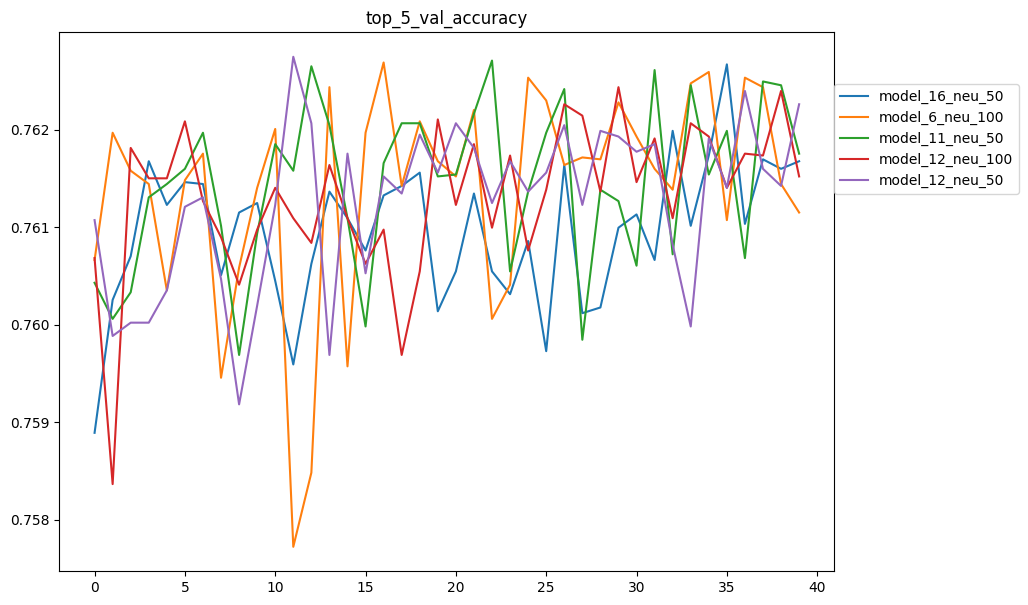

In [102]:
x.sort_values(by='accuracy',ascending=False,inplace=True)

plt.figure(figsize=(10,7))
for i in list(x['model'])[:5]:
    plt.plot(range(len(record[i]['accuracy'])),record[i]['accuracy'],label=i)
    plt.legend(loc=(1,0.7))
    
plt.title('accuracy')
plt.show()


plt.figure(figsize=(10,7))
for i in list(x['model'])[:5]:
    plt.plot(range(len(record[i]['val_accuracy'])),record[i]['val_accuracy'],label=i)
    plt.legend(loc=(1,0.7))
    
plt.title('val_accuracy')
plt.show()

print('accuracy top 5 \n',x['model'][:5],'\n\n')


x.sort_values(by='val_accuracy',ascending=False,inplace=True)

print('val_accuracy top 5 \n',x['model'][:5])

plt.figure(figsize=(10,7))
for i in list(x['model'])[:5]:
    plt.plot(range(len(record[i]['val_accuracy'])),record[i]['val_accuracy'],label=i)
    plt.legend(loc=(1,0.7))
plt.title('top_5_val_accuracy')

plt.plot()

<font size = 4>
    <ul>
    <li>Neural Networks generally have problems with overfitting. therefore we cannot just rely on accuracy for determining the best ANN model. We have to look to the validation data accuracy too.</li>
    <li>model with 10 hidden layers and 50 initial neurons per layer (approximation) works the best for accuracy however it performes really avarage on validation accuracy.</li>
    <li> On the other hand model with 6 hidden layers is present in both top 5 ranking of model accuracy (twice) and validation data accuracy (once).
    <li>therefore we can safely say that model with 6 hidden layers is the optimum for the given data</li>
</ul>  
        </font>

## Now we will run various models searching for how many number of neurons we need for every layer for our 6 layer deep NN.

In [103]:
if run_models == True:


    record2 = {}

    epo = 40
    for hidden_layers in [6]:
        for neurons in [20,50,70,100,130,150,200,300,400]:
            model = Sequential()

            print('\n\n','model_'+str(hidden_layers)+'_neu_'+str(neurons),'\n\n\n')

            n = 0

            model.add(Dense(units=neurons, kernel_initializer='he_uniform', activation='relu',input_dim=X.shape[1]))

            for i in range(hidden_layers-1):
                if n <= hidden_layers/2 and neurons*0.6 > 2:
                    model.add(Dense(units=neurons*0.6, kernel_initializer='he_uniform', activation='relu'))

                elif n <= hidden_layers/2 and neurons*0.6 <= 2:
                    model.add(Dense(units=neurons, kernel_initializer='he_uniform', activation='relu'))

                else:
                    model.add(Dense(units=neurons*1.4, kernel_initializer='he_uniform', activation='relu'))

                n+=1

            model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

            model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

            save_hist = model.fit(X_train, y_train, validation_split=0.30, epochs=epo)



            record2['model_'+str(hidden_layers)+'_neu_'+str(neurons)] = save_hist.history
            
    with open('data/record2','wb') as file:
        pickle.dump(record2,file,pickle.HIGHEST_PROTOCOL)
            
else:
    with open('data/record2','rb') as file:
        record2 = pickle.load(file)
        

In [104]:
x = pd.DataFrame(columns=['model','accuracy','val_accuracy'])

for i in record2.keys():
    x.loc[len(x)]=[i,round(max(record2[i]['accuracy'][-10:])*100,5),round(max(record2[i]['val_accuracy'][-10:])*100,5)]

x['mean_accuracy'] = (x['accuracy']+x['val_accuracy'])/2
x.sort_values(by='mean_accuracy',ascending=False,inplace=True)
x

,model,accuracy,val_accuracy,mean_accuracy
4,model_6_neu_130,76.293660,76.292170,76.292915
3,model_6_neu_100,76.286980,76.288280,76.287630
5,model_6_neu_150,76.297000,76.261030,76.279015
1,model_6_neu_50,76.294490,76.259080,76.276785
8,model_6_neu_400,76.276970,76.262970,76.269970
2,model_6_neu_70,76.251110,76.239610,76.245360
6,model_6_neu_200,76.274470,76.210410,76.242440
0,model_6_neu_20,76.246940,76.216250,76.231595
7,model_6_neu_300,76.276140,76.185100,76.230620


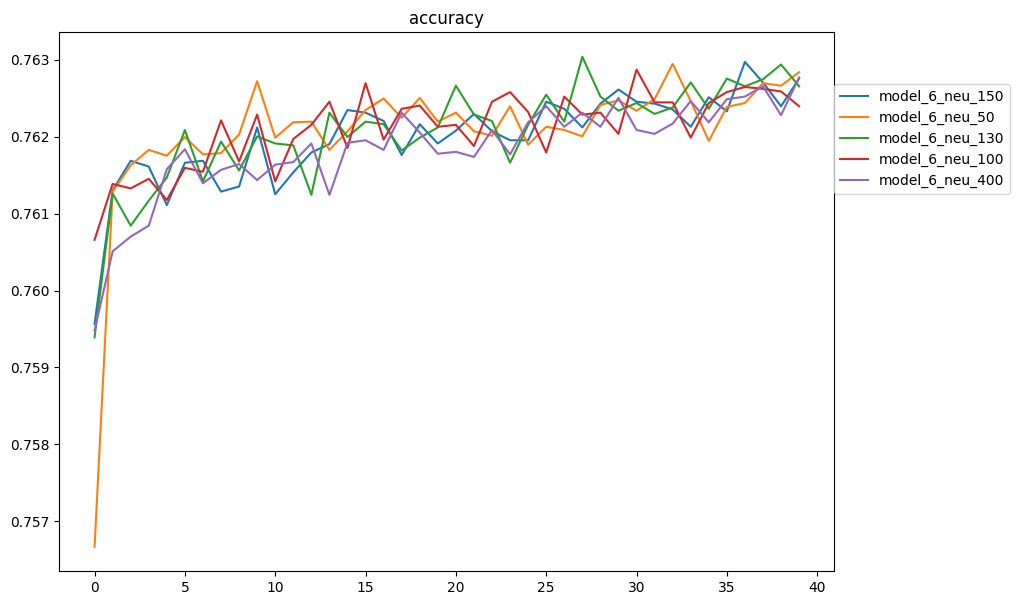

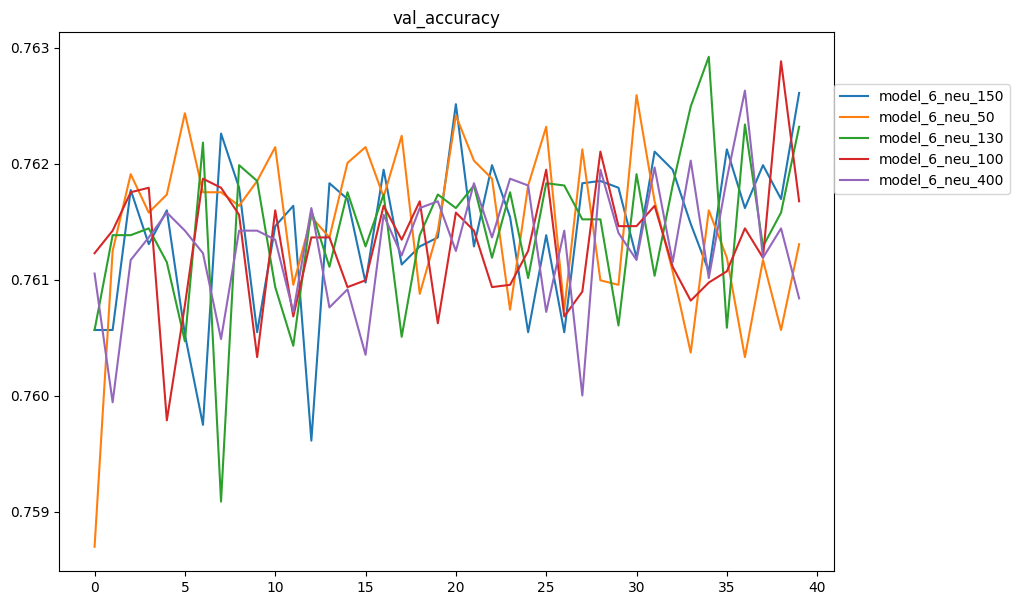

accuracy top 5 
 5    model_6_neu_150
1     model_6_neu_50
4    model_6_neu_130
3    model_6_neu_100
8    model_6_neu_400
Name: model, dtype: object 


val_accuracy top 5 
 4    model_6_neu_130
3    model_6_neu_100
8    model_6_neu_400
5    model_6_neu_150
1     model_6_neu_50
Name: model, dtype: object


/tmp/ipykernel_176833/2443765697.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('accuracy top 5 \n',x['model'][:5],'\n\n')
/tmp/ipykernel_176833/2443765697.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('val_accuracy top 5 \n',x['model'][:5])


[]

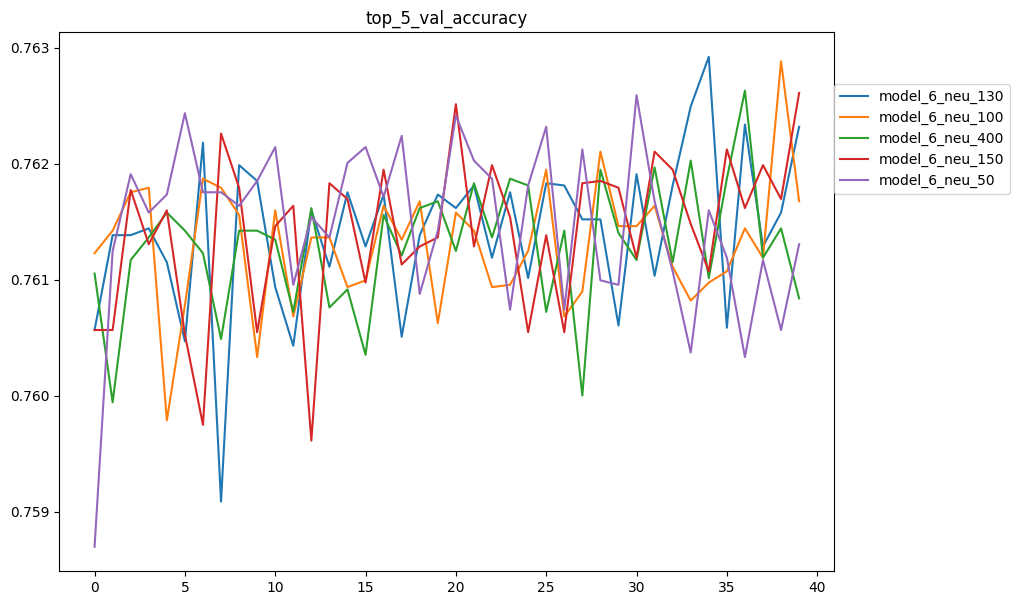

In [105]:
x.sort_values(by='accuracy',ascending=False,inplace=True)

plt.figure(figsize=(10,7))
for i in list(x['model'])[:5]:
    plt.plot(range(len(record2[i]['accuracy'])),record2[i]['accuracy'],label=i)
    plt.legend(loc=(1,0.7))
    
plt.title('accuracy')
plt.show()


plt.figure(figsize=(10,7))
for i in list(x['model'])[:5]:
    plt.plot(range(len(record2[i]['val_accuracy'])),record2[i]['val_accuracy'],label=i)
    plt.legend(loc=(1,0.7))
    
plt.title('val_accuracy')
plt.show()

print('accuracy top 5 \n',x['model'][:5],'\n\n')


x.sort_values(by='val_accuracy',ascending=False,inplace=True)

print('val_accuracy top 5 \n',x['model'][:5])

plt.figure(figsize=(10,7))
for i in list(x['model'])[:5]:
    plt.plot(range(len(record2[i]['val_accuracy'])),record2[i]['val_accuracy'],label=i)
    plt.legend(loc=(1,0.7))
plt.title('top_5_val_accuracy')

plt.plot()

<font size = 4>
    <ul>
        <li>6 hidden layers and 130 Neural networks works well in respect to both accuracy and validation accuracy. Beacuse the same is in top 3 rank of model accuracy, as well as it leads on the rank of validation accuracy.</li>
        <li>We need to find a good balance betwwen these two variables. And that balance is achieved with model with 6 hidden layers and 130 NN; it is our best ANN model. </li>
    
 

In [106]:
callback = EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)


opt = Adam(learning_rate=0.0001)

In [107]:
if run_models == True:
    
    classifier = Sequential()
    
    layers = 6
    
    neu = 130

    epo = 1000
    
    classifier.add(Dense(units=neu, kernel_initializer='he_uniform', activation='relu',input_dim=X.shape[1]))

    for layer in range(layers-1):
    
        classifier.add(Dense(units=neu*1.4, kernel_initializer='he_uniform', activation='relu'))


    classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

    classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    
    hist = classifier.fit(X_train, y_train, validation_split=0.35, epochs=epo,callbacks=callback)
    
    classifier.save('models/classifier')
    
    with open('data/hist','wb') as file:
        pickle.dump(hist.history,file,protocol=pickle.HIGHEST_PROTOCOL)
        
else:
    classifier = load_model('models/classifier/')
    with open('data/hist','rb') as file:
        hist = pickle.load(file)


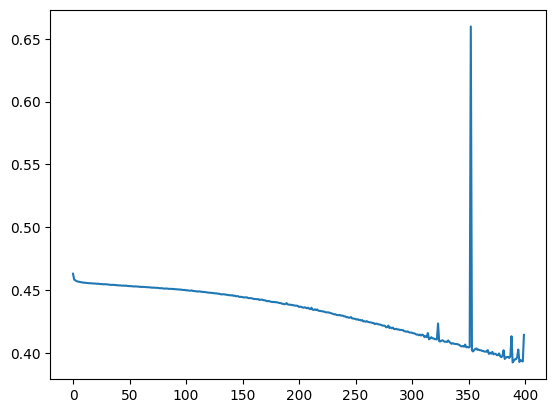

In [108]:
plt.plot(range(len(hist['loss'])),hist['loss'])

In [109]:
hist['loss'][-10:]

[0.3938676118850708,
 0.39505085349082947,
 0.3950929343700409,
 0.39670097827911377,
 0.40277719497680664,
 0.3928695023059845,
 0.39435192942619324,
 0.3937288522720337,
 0.3933034837245941,
 0.4144552946090698]

<font size =4>
    the loss of the model is falling

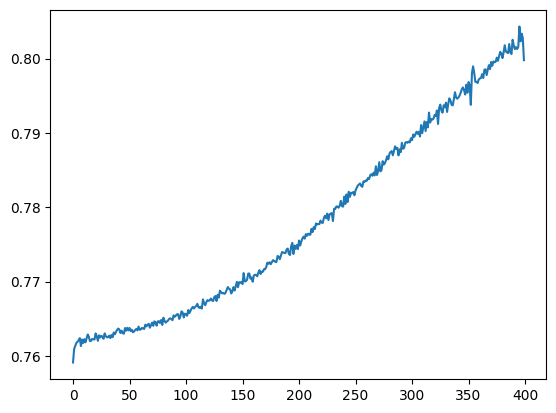

In [110]:
plt.plot(range(len(hist['accuracy'])),hist['accuracy'])

<font size =4>
    the accuracy of the model is increasing

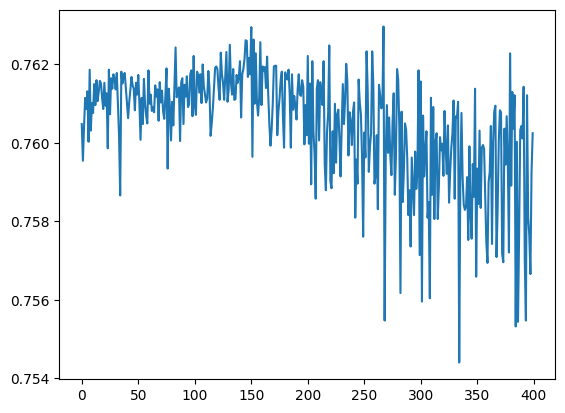

In [111]:
plt.plot(range(len(hist['accuracy'])),hist['val_accuracy'])

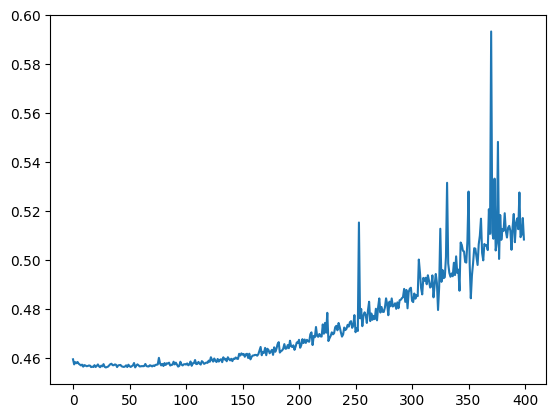

In [112]:
plt.plot(range(len(hist['accuracy'])),hist['val_loss'])

<font size =4>
    the validation data loss of the model is increasing which is a bad thing, but even then the accuracy of the validation data is increasing.<br>
    and given that every model is also increasing the loss of validation data, we can have compromise between best available model and least amount of increase in validation loss

## Resampling data test

In [113]:
y_pred = classifier.predict(X_test)

2882/2882 [==============================] - 5s 2ms/step


In [114]:
y_pred = pd.DataFrame(y_pred)[0].apply(lambda x: 1 if x>=0.5 else 0)

In [115]:
roc_auc_score(y_test,y_pred)

0.783034796102364

In [116]:
cm = confusion_matrix(y_test,y_pred)
cm



array([[33939, 15374],
       [ 5239, 37645]])

In [117]:
accuracy_score(y_test,y_pred)

0.7764243955877089

In [118]:
1- cm[0][1] / cm[0][0]

0.5470108135183712

In [119]:
1- cm[1][0] / cm[1][1]

0.860831451720016

<font size =4>
    <ul>
        <li>this model predicts (resample data) whether an existing customer will NOT respond to Policy Sales Channels with 54% accuracy which is really bad.</li>
        <li> the model predicts whether an existing customer WILL respond with 85% accuracy which is really good.</li>
        <li>These numbers are not very reliable as the ANN has seen the data especially the data with positive response, as the dataset of resampled for it being an unbalanced data.</li>

## Original test data

In [120]:
categorical_data

['Gender',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Region_Code',
 'Policy_Sales_Channel']

In [121]:
x = get_dummy(test_df,categorical_data)
x.drop(columns=['id'],inplace=True)

id                          float64
Age                         float64
Driving_License             float64
Previously_Insured          float64
Annual_Premium              float64
                             ...   
Policy_Sales_Channel_6      float64
Policy_Sales_Channel_50     float64
Policy_Sales_Channel_144    float64
Policy_Sales_Channel_143    float64
Policy_Sales_Channel_41     float64
Length: 225, dtype: object


In [122]:
x_test = scalar.transform(x.drop(columns=['Response']))
y_test = x['Response']

(array([21479.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

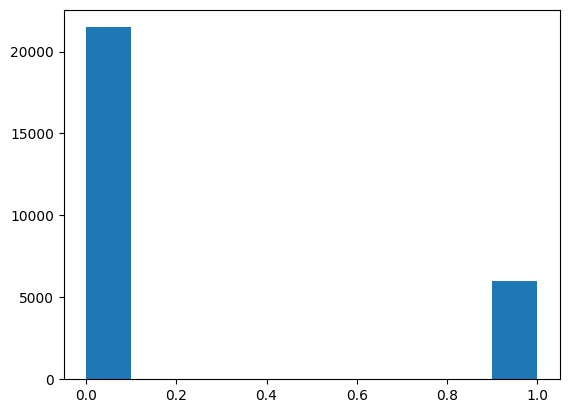

In [123]:
plt.hist(y_test)

In [124]:
y_pred = classifier.predict(x_test)

859/859 [==============================] - 1s 2ms/step


In [125]:
y_pred = pd.DataFrame(y_pred)[0].apply(lambda x: 1 if x>=0.5 else 0)

In [126]:
roc_auc_score(y_test,y_pred)

0.8437290919813151

In [127]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[18940,  2539],
       [ 1166,  4834]])

In [128]:
accuracy_score(y_test,y_pred)

0.8651697660031297

In [129]:
1- cm[0][1] / cm[0][0]



0.8659450897571278

In [130]:
1- cm[1][0] / cm[1][1]

0.7587918907736864

<font size =4>
    <ul>
        <li>In this the real test dataset the accuracy improves for both positive and negative classification. </li>
        <li> this time the positive classification accuracy improves to 86% given that the positive responses are really more than the negative ones in this dataset and the negative classification lingers around 75% which is certainly not bad.  </li>

In [131]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [132]:
customer_id = submission_df['id']
x_test = submission_df.drop(columns=['id'])

In [133]:
x_test['age_youth'] = x_test['Age'].apply(lambda x: 1 if x<=24 else 0)
x_test['age_adult'] = x_test['Age'].apply(lambda x: 1 if x>24 and x<=64 else 0)
x_test['age_seniors'] = x_test['Age'].apply(lambda x: 1 if x>64 else 0)

In [134]:
x_test = get_dummy(x_test,categorical_data)

Age                         float64
Driving_License             float64
Previously_Insured          float64
Annual_Premium              float64
Vintage                     float64
                             ...   
Policy_Sales_Channel_6      float64
Policy_Sales_Channel_50     float64
Policy_Sales_Channel_144    float64
Policy_Sales_Channel_143    float64
Policy_Sales_Channel_41     float64
Length: 223, dtype: object


In [135]:
x_test = scalar.transform(x_test)

In [136]:
y_pred = classifier.predict(x_test)

y_pred = pd.DataFrame(y_pred)[0].apply(lambda x: 1 if x>=0.5 else 0)

  60/3970 [..............................] - ETA: 6s

2022-11-02 19:40:12.183756: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 113317004 exceeds 10% of free system memory.


3970/3970 [==============================] - 6s 2ms/step


In [137]:
submission = pd.DataFrame([customer_id,y_pred]).T
submission.columns = ['id','Response']
submission

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,1
127034,508144,0
127035,508145,0


In [138]:
submission.to_csv('submission.csv',index=False)